# PROYECTO INDIVIDUAL - ACCIDENTES AEREOS


### Nos solicitaron realizar el siguiente proyecto, ubicándonos desde un rol de Data Analyst. 
### El proyecto consiste basicamente en manipular cierta información sobre accidentes aereos que nos fue proporcionada, y en función de un profundo análisis exploratorio, comprensión del problema y realización de visualizaciones, poder contar y explicar nuestras conclusiones, deducciones y resultados obtenidos, mediante la técnica de Storytelling.  

### Habiendo mencionado la mecánica y descripción del problema, procedemos a comenzar entonces nuestro análisis exploratorio de la información brindada. 
### Para eso, es que comenzamos importando y convirtiendo en dataframe nuestro archivo de accidentes aereos que nos fue brindado, (el cual se nos entregó en formato 'csv') junto con las librerias que utilizaremos a lo largo de todo el proyecto:

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import skew
from math import sqrt
from numpy import mean, var
import copy 
from sklearn import preprocessing
import json

# Especificamos la ruta del archivo CSV que se desea importar
archivo_csv = 'AccidentesAviones.csv'

# Utilizamos la función read_csv de pandas para cargar el archivo CSV en un DataFrame
dfacc = pd.read_csv(archivo_csv)

# Ahora lo llamamos para ver como nos muestra la informacion: 
dfacc.head()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


#### Ahora si, estamos listos para arrancar!

#  Análisis descriptivo: Entendiendo los datos


#### Exploración:
 Pandas nos provee algunos métodos para hacer una exploración simple de los datos. Algunos de ellos son:

- columns. Listar las etiquetas de las columnas del df.
- dtypes. Serie con los tipos de cada una de las columnas.
- describe. Estadísticas descriptivas incluyendo aquellas que sumarizan la tendencia central, dispersión y forma de la distribución, excluyendo los valores nulos. Analiza tanto tipos numéricos como de objetos, así como también con datos mixtos. La salida que se obtiene depende de qué es lo que se le provee.
- isnull. Nos va a mostrar los valores nulos. 
- info. Imprime información del df, incluyendo el tipo del index y las columnas, los valores no nulos y el uso de memoria.
Primero, vamos a ver las columnas, es decir, la información que tenemos de los accidentes aéreos.

In [2]:
dfacc.columns

Index(['Unnamed: 0', 'fecha', 'HORA declarada', 'Ruta', 'OperadOR',
       'flight_no', 'route', 'ac_type', 'registration', 'cn_ln', 'all_aboard',
       'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos',
       'passenger_fatalities', 'crew_fatalities', 'ground', 'summary'],
      dtype='object')

### Significado de Columnas

Podemos mostrar el significado de las columnas. Para esto, y teniendo en cuenta que no se nos ha proporcionado ningún diccionario de datos que nos muestre/informe previamente que significado tiene cada columna o que información se propone mostrar, procederemos a armarlo en base a nuestro criterio y a lo que nos muestra el dataframe, analizando entonces las relaciones: 

1.	Unnamed: 0: Este parece ser un índice o identificador único para cada fila del conjunto de datos.
2.	fecha: Esta columna probablemente contiene la fecha en que ocurrió el incidente o evento relacionado con cada fila.
3.	HORA declarada: Puede ser la hora declarada o registrada del incidente.
4.	Ruta: Esta columna podría indicar la ubicación geográfica o la ruta del evento.
5.	OperadOR: Podría representar la compañía, organización o entidad responsable de la operación o vuelo.
6.	flight_no: Este campo posiblemente se refiere al número de vuelo.
7.	route: Podría describir la ruta específica del vuelo o el evento.
8.	ac_type: Es probable que indique el tipo de aeronave involucrada.
9.	registration: Puede representar el número de registro de la aeronave.
10.	cn_ln: Esto podría hacer referencia al número de construcción o número de línea de la aeronave.
11.	all_aboard: Posiblemente represente el número total de personas a bordo, incluyendo pasajeros y tripulación.
12.	PASAJEROS A BORDO: Podría ser el número de pasajeros a bordo en el momento del evento.
13.	crew_aboard: Este campo podría indicar el número de miembros de la tripulación a bordo.
14.	cantidad de fallecidos: Posiblemente indique la cantidad total de personas fallecidas en el evento.
15.	passenger_fatalities: Podría representar el número de pasajeros fallecidos.
16.	crew_fatalities: Esto podría ser el número de miembros de la tripulación fallecidos.
17.	ground: Posiblemente, se refiera a daños o fatalidades en el suelo como resultado del evento. Creemos que es la cantidad de civiles que se murieron en el suelo, por lo que se especifica en el summary. 
18.	summary: Esta columna podría contener una descripción o resumen del evento o incidente.

In [3]:
# Nos damos cuenta que hay cambios en la forma en que debería estar la denominación de los campos y por ello decidimos renombrar las columnas:
dfacc.rename(columns={ 'fecha': 'date', 
                    'HORA declarada': 'time',
                    'Ruta': 'location',
                    'OperadOR': 'airline_operator',
                    'flight_no': 'flight_no',
                    'ac_type': 'aircraft_type',
                    'registration': 'aircraft_registration',
                    'cn_ln': 'construction_fuselage_number',
                    'all_aboard': 'total_aboard',
                    'PASAJEROS A BORDO': 'passengers_aboard',
                    'crew_aboard': 'crew_aboard',
                    'cantidad de fallecidos': 'total_fatalities',
                    'passenger_fatalities': 'passengers_fatalities',
                    'crew_fatalities': 'crew_fatalities',
                    'ground': 'total_killed_ground',
                    'summary': 'summary'
}, inplace=True)
dfacc.head()

,Unnamed: 0,date,time,location,airline_operator,flight_no,route,aircraft_type,aircraft_registration,construction_fuselage_number,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,total_killed_ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


Continuamos mostrando informacion: 

In [4]:
dfacc.dtypes

Unnamed: 0                       int64
date                            object
time                            object
location                        object
airline_operator                object
flight_no                       object
route                           object
aircraft_type                   object
aircraft_registration           object
construction_fuselage_number    object
total_aboard                    object
passengers_aboard               object
crew_aboard                     object
total_fatalities                object
passengers_fatalities           object
crew_fatalities                 object
total_killed_ground             object
summary                         object
dtype: object

In [5]:
dfacc.isnull().sum()

Unnamed: 0                      0
date                            0
time                            0
location                        0
airline_operator                0
flight_no                       0
route                           1
aircraft_type                   0
aircraft_registration           0
construction_fuselage_number    0
total_aboard                    0
passengers_aboard               0
crew_aboard                     0
total_fatalities                0
passengers_fatalities           0
crew_fatalities                 0
total_killed_ground             0
summary                         0
dtype: int64

In [6]:
dfacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    5008 non-null   int64 
 1   date                          5008 non-null   object
 2   time                          5008 non-null   object
 3   location                      5008 non-null   object
 4   airline_operator              5008 non-null   object
 5   flight_no                     5008 non-null   object
 6   route                         5007 non-null   object
 7   aircraft_type                 5008 non-null   object
 8   aircraft_registration         5008 non-null   object
 9   construction_fuselage_number  5008 non-null   object
 10  total_aboard                  5008 non-null   object
 11  passengers_aboard             5008 non-null   object
 12  crew_aboard                   5008 non-null   object
 13  total_fatalities  

Verificamos que solamente hay un solo valor nulo en todo el DF. Pero lo que verificamos fue que existen muchos registros que contienen valores con signos de pregunta (?), que si bien no son nulos, no nos sirven para un análisis posterior y pueden generar mala información o conclusiones, sesgando la observación. Por este motivo, procederemos a modificar esas columnas luego. 

In [7]:
conteo_signos_pregunta = dfacc.applymap(lambda x: str(x).count('?'))

total_signos_pregunta = conteo_signos_pregunta.values.sum()

total_signos_pregunta


7978

### Análisis Columna por Columna

#### Eliminamos columnas innecesarias

Una vez ya importado el dataframe, y con una vista previa de la información, descripción y referencias de que significado tiene cada columna, nos proponemos empezar a analizar columna por columna, verificando con que informacion estamos tratando y a su vez ir formateando y corrigiendo errores que pudieran tener cada una.

Comenzamos eliminando las columnas que consideramos innecesarias, por no mostrar informacion relevante para nuestro análisis: 

In [8]:
dfacc = dfacc.drop(['Unnamed: 0', 'aircraft_registration', 'construction_fuselage_number'], axis=1)

Verificamos que se haya eliminado:

In [9]:
dfacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   date                   5008 non-null   object
 1   time                   5008 non-null   object
 2   location               5008 non-null   object
 3   airline_operator       5008 non-null   object
 4   flight_no              5008 non-null   object
 5   route                  5007 non-null   object
 6   aircraft_type          5008 non-null   object
 7   total_aboard           5008 non-null   object
 8   passengers_aboard      5008 non-null   object
 9   crew_aboard            5008 non-null   object
 10  total_fatalities       5008 non-null   object
 11  passengers_fatalities  5008 non-null   object
 12  crew_fatalities        5008 non-null   object
 13  total_killed_ground    5008 non-null   object
 14  summary                5008 non-null   object
dtypes: object(15)
memory 

#### Fecha, Hora declarada y ruta

Continuamos ahora con las columnas 'fecha', 'hora declarada' y 'ruta'. Primero, procederemos a formatear las columnas 'fecha' y 'hora declarada' para dejar esas columnas listas para el trabajo posterior:

In [10]:
# Comenzamos con fecha, convertimos a datetime:

dfacc['date'] = pd.to_datetime(dfacc['date'], errors='coerce')


In [11]:
# Cambiamos el formato y nombre de la columna ['time'] a número: 

dfacc['time'] = pd.to_numeric(dfacc['time'], errors='coerce')
dfacc['time'] = dfacc['time'].fillna(0).astype(int).apply(lambda x: '{:04}'.format(x))
dfacc['time'] = dfacc['time'].apply(lambda x: f"{x[:2]}:{x[2:]}")

# Dejamos los valores con 00:00 como valores sin informacion: 
dfacc.loc[dfacc['time'] == '00:00', 'time'] = ''

Completamos los valores que quedaron en 0, con valores vacíos, para manfiestar que allí no se encuentra ningún registro de hora.

#### Location - utilizamos librerias de palabras y creamos columnas nuevas

Pasamos a la columna 'location' que, según nuestro entendimiento, nos muestra la ubicacion geográfica del accidente:

In [12]:
dfacc['location'].head(20)

0                    Fort Myer, Virginia
1                Juvisy-sur-Orge, France
2              Atlantic City, New Jersey
3     Victoria, British Columbia, Canada
4                     Over the North Sea
5             Near Johannisthal, Germany
6                        Tienen, Belgium
7                  Off Cuxhaven, Germany
8                  Near Jambol, Bulgeria
9                    Billericay, England
10                  Potters Bar, England
11                        Mainz, Germany
12          Off West Hartlepool, England
13                    Near Gent, Belgium
14                  Off Northern Germany
15          Near Texel Island, North Sea
16        Off Vlieland Island, North Sea
17                Near Yarmouth, England
18                   Off western Denmark
19                Near Luneville, France
Name: location, dtype: object

In [13]:
dfacc.location.unique()

array(['Fort Myer, Virginia', 'Juvisy-sur-Orge, France',
       'Atlantic City, New Jersey', ..., 'Near Pyin Oo Lwin, Myanmar',
       'Patikul, Sulu, Philippines', 'Palana, Russia'], dtype=object)

Es necesario reducir la cantidad de lugares por lo que haremos un análisis de las palabras que más se repiten

In [14]:
# Reemplazamos los valores nulos por un valor vacío
dfacc['location'] = dfacc['location'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
dfacc['location'] = dfacc['location'].str.replace('?', '')

Instalamos las librerias usada para el análisis:

In [15]:
# pip install wordcloud
# pip install PIL

Comenzamos haciendo un análisis de las palabras que forman parte de la columna, utilizando nubes de palabras, para ver los valores mas repetidos. Esto nos podría indicar a simple vista cuales son los puntos geográficos donde han ocurrido mas accidentes: 

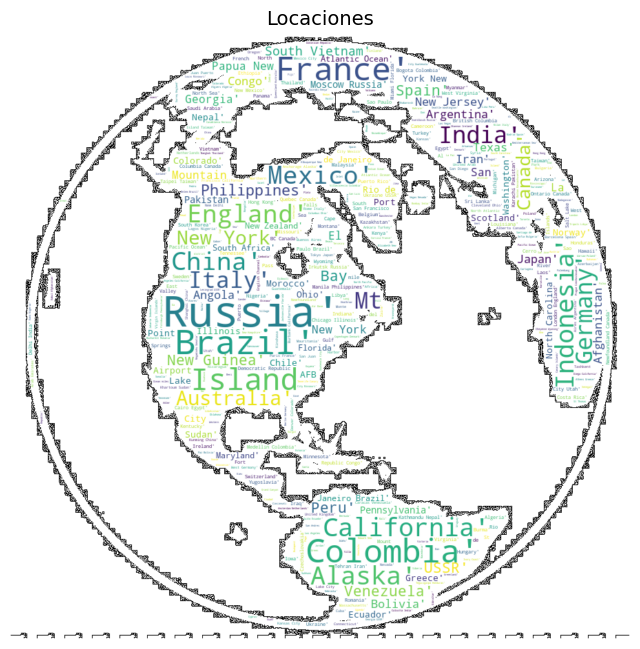

In [16]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = str(dfacc.location.tolist())
globe_mask = np.array(Image.open('mundo.jpg'))

stopwords = set(STOPWORDS)
stopwords.add('nan')
stopwords.add('Near')

contour_color = 'black'
contour_width = 0.1

wc = WordCloud(background_color="white", max_words=2000, mask=globe_mask,
               stopwords=stopwords, contour_color=contour_color, contour_width=contour_width)
wc.generate(text)

plt.figure(figsize=(8, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Locaciones', loc='Center', fontsize=14)
plt.show()



Explicamos detalladamente como hicimos paso a paso: 
- Importamos las bibliotecas necesarias. 
- Pasamos la columna location a una lista para poder trabajar.
- Se carga la imagen que servira como máscara de la nube de palabras y con numpy la convertimos en una matriz. Luego configuramos el contorno y su ancho.
- Se crea la instancia de WordCloud y se configuran los parametros.
- Generamos la nube de palabras utilizando 'text' y la configuracion que asignamos. Y luego creamos una figura de matplotlib para mostrar la nube de palabras.
- Por último, mostramos la nube de palabras en la figura con 'imshow' y configurando el titulo y aspecto. 

Para poder mostrarlo de forma mas significativa, y que tenga mayor valor, nos damos cuenta de que hay ciertos estados o ciudades que no son paises. Modificaremos la columna 'location' para extraer el país en función a las coincidencias con la siguiente lista:

In [17]:
lista_paises = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia",
    "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium",
    "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria",
    "Burkina Faso", "Burundi", "Côte d'Ivoire", "Cabo Verde", "Cambodia", "Cameroon", "Canada",
    "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros", "Congo", "Costa Rica", "Croatia",
    "Cuba", "Cyprus", "Czech Republic", "Democratic Republic of the Congo", "Denmark", "Djibouti", "Dominica",
    "Dominican Republic", "Ecuador", "England", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia",
    "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece",
    "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Holy See", "Honduras", "Hungary",
    "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy","Ivory Coast", "Jamaica", "Japan", "Jordan",
    "Kazakhstan", "Kenya", "Kiribati", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia",
    "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali",
    "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco", "Mongolia",
    "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand",
    "Nicaragua", "Nigeria", "Niger", "North Korea", "North Macedonia", "Norway", "Oman", "Pakistan", "Palau",
    "Palestine State", "Panama", "Papua", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Puerto Rico",
    "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia",
    "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Scotland",
    "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia",
    "South Africa", "South Korea", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland",
    "Syria", "Tajikistan", "Taiwan", "Tanzania", "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago",
    "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom",
    "United States", "Uruguay", "USSR", "Uzbekistan", "Vanuatu", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"
]

Realizamos una función para obtener las coincidencias con 'country': 

In [18]:
# Definimos la función. Si no encuentra coincidencia en 'location' colocará 'other':

def obtener_pais(location):
    for pais in lista_paises:
        if pais.lower() in location.lower():
            return pais
    return 'other'

# Aplicamos la función 'obtener_pais' a la columna 'location' y creamos la columna 'country': 
dfacc['country'] = dfacc['location'].apply(obtener_pais)

Aca verificamos que la mayoría de los valores que contienen 'other' representan nombres de estados de los Estados Unidos, por lo que le pasamos una lista de los mismos y realizamos el mismo ejercicio:

In [19]:
filtro = dfacc['country'] == 'other'
resultados = dfacc[filtro]
resultados.head()

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,total_killed_ground,summary,country
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",other
2,1912-07-12,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,other
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...,other
8,1916-07-28,,"Near Jambol, Bulgeria",Military - German Army,?,?,Schutte-Lanz S-L-10 (airship),20,?,?,20,?,?,0,"Crashed near the Black Sea, cause unknown.",other
15,1917-05-14,05:15,"Near Texel Island, North Sea",Military - German Navy,?,?,Zeppelin L-22 (airship),21,?,?,21,?,?,0,"Crashed into the sea from an altitude of 3,000...",other


In [20]:
# Lista de estados de los Estados Unidos
states_usa = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida",
    "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
    "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska",
    "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio",
    "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas",
    "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

# Reemplazamos en  'country' el valor 'other' por 'United States' si 'location' contiene un estado de los Estados Unidos
dfacc.loc[dfacc['location'].str.contains('|'.join(states_usa), case=False, na=False), 'country'] = 'United States'

In [21]:
# Verificamos:
aaa = dfacc['location'].unique()
for i in aaa: 
    print(i)

Fort Myer, Virginia
Juvisy-sur-Orge, France
Atlantic City, New Jersey
Victoria, British Columbia, Canada
Over the North Sea
Near Johannisthal, Germany
Tienen, Belgium
Off Cuxhaven, Germany
Near Jambol, Bulgeria
Billericay, England
Potters Bar, England
Mainz, Germany
Off West Hartlepool, England
Near Gent, Belgium
Off Northern Germany
Near Texel Island, North Sea
Off Vlieland Island, North Sea
Near Yarmouth, England
Off western Denmark
Near Luneville, France
Over the Mediterranean
Off Helgoland Island, Germany
Ameland Island, North Sea
Elizabeth, New Jersey
Cleveland, Ohio
Dix Run, Pennsylvania
Chicago, Illinois
Verona, Italy
Newcastle, England
Cantonsville, Maryland
English Channel off Forkstone, Kent
Long Valley, New Jersey
Catherham, Surrey, UK
New Paris, Indiana
Newark, New Jersey
Heller Field, New Jersey
Oskaloosa, Iowa
Cartagena, Columbia
Bedford, England
College Park, Maryland
Morristown, New Jersey
Pemberville, Ohio
Hillersburg, Pennsylvania
Off Port Vendres, France
Valencia, Sp

Ya tenemos segmentados los accidentes segun aproximaciones de si fueron ocurridos en tierra o en el agua (mar, oceanos, lagos, etc.) y además los tenemos filtrados por países, creando columnas nuevas a tales efectos. 

Ahora, para poder hacer un análisis mas detallado, procedemos a realizar una funcion para poder filtrar -utilizando expresiones regulares- los accidentes que fueron en tierra o en agua (mar, rio, oceanos, etc):

In [22]:
# Primero separamos los vuelos, considerando si la aeronave colisionó en agua o suelo:
import re

# Creamos una nueva columna llamada 'surface'y definimos una función para asignarle los valores:
def assign_surface(location):
    if re.search(r'\bsea\b|\bocean\b|\briver\b|\bchannel\b|\bover\b', location, flags=re.IGNORECASE):
        return 'water'
    else:
        return 'ground'

# Creamos la columna 'surface' para identificar vuelos con accidentes en tierra o mar
dfacc['surface'] = dfacc['location'].apply(assign_surface)

In [23]:
dfacc.country.unique()

array(['United States', 'France', 'Canada', 'other', 'Germany', 'Belgium',
       'England', 'Denmark', 'Italy', 'Spain', 'Australia', 'China',
       'Morocco', 'United Kingdom', 'Oman', 'Russia', 'Colombia',
       'Hungary', 'Mauritania', 'Slovakia', 'Algeria', 'Finland',
       'Uruguay', 'Brazil', 'Netherlands', 'Greece', 'Mexico', 'Cuba',
       'Iran', 'Madagascar', 'Argentina', 'New Zealand', 'Bulgaria',
       'South Africa', 'Thailand', 'Iraq', 'Chile', 'Lebanon', 'Bolivia',
       'Ukraine', 'Peru', 'Syria', 'Pakistan', 'Egypt', 'Honduras',
       'Switzerland', 'Panama', 'Poland', 'Sweden', 'Norway', 'Croatia',
       'Tajikistan', 'Libya', 'Gambia', 'Guinea', 'Sudan', 'Samoa',
       'India', 'Tanzania', 'Kenya', 'Japan', 'Mozambique', 'Ecuador',
       'Malta', 'Indonesia', 'Scotland', 'Estonia', 'Puerto Rico',
       'Turkmenistan', 'Kazakhstan', 'Austria', 'Portugal', 'Guyana',
       'Ireland', 'Nicaragua', 'Ivory Coast', 'Philippines', 'Bahamas',
       'Liberia', 'Ni

In [24]:
dfacc.country.nunique()

164

In [25]:
dfacc.surface.unique()

array(['ground', 'water'], dtype=object)

Filtramos los registros para 'water' para verificar que funcione: 

In [26]:
dfacc[dfacc['surface'] == 'water']

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,total_killed_ground,summary,country,surface
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...,other,water
15,1917-05-14,05:15,"Near Texel Island, North Sea",Military - German Navy,?,?,Zeppelin L-22 (airship),21,?,?,21,?,?,0,"Crashed into the sea from an altitude of 3,000...",other,water
16,1917-06-14,08:45,"Off Vlieland Island, North Sea",Military - German Navy,?,?,Zeppelin L-43 (airship),24,?,?,24,?,?,0,Shot down by British aircraft.,other,water
20,1918-04-07,21:30,Over the Mediterranean,Military - German Navy,?,?,Zeppelin L-59 (airship),23,?,?,23,?,?,0,Exploded and crashed into the sea off the sout...,other,water
22,1918-08-11,10:00,"Ameland Island, North Sea",Military - German Navy,?,?,Zeppelin L-53 (airship),19,?,?,19,?,?,0,Shot down by british aircraft.,other,water
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4671,2008-04-28,09:38,"Off Crimea, Black Sea",Naftogaz,?,?,Mil Mi-8T,20,18,2,20,18,2,0,The helicopter crashed after the tail section ...,other,water
4729,2009-06-01,00:15,"Atlantic Ocean, 570 miles northeast of Natal, ...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,228,216,12,228,216,12,0,The Airbus went missing over the Atlantic Ocea...,Brazil,water
4886,2014-03-08,02:41,South Indian Ocean,Malaysia Airlines,370,Kuala Lumpur - Beijing,Boeing 777-200,239,227,12,239,227,12,0,Radar contact was lost with the aircraft 2 hou...,India,water
4904,2014-12-28,06:18,Java Sea,AirAsia,8501,Surabaya - Singapore,Airbus A-320-216,162,155,7,162,155,7,0,The aircraft went missing while en route from ...,other,water


Ahora que ya tenemos un numero más razonable para el análisis, vamos a agrupamos los datos por país: 

In [27]:
total_accidentes_por_pais = dfacc.groupby('country')['date'].count()

# Excluimos el valor 'other'
total_accidentes_por_pais = total_accidentes_por_pais.drop('other', errors='ignore')

# Obtenemos el top 10 de países por accidentes
top_10_paises = total_accidentes_por_pais.nlargest(10)
top_10_paises

country
United States    1037
Russia            255
Brazil            176
Colombia          150
Canada            133
France            129
India             112
England           101
Indonesia          99
China              98
Name: date, dtype: int64

Con este simple 'top ten' podemos mostrar que hemos llegado a mostrar los países donde han ocurrido la mayor cantidad de accidentes. Ademas, verificamos que nuestra columna 'country' coincide con muchos de los valores observados en la nube de palabras. 

Ya tenemos entonces, como dijimos, nuestra columna 'country' con los países más representativos del dataset. 
Si verificamos los valores que contienen 'other' en la columna 'country' y que su superficie sea 'ground', verificamos que no representan una gran cantidad dentro del dataset y por lo general corresponen a valores mal escritos.

In [28]:
dfacc[(dfacc['surface'] == 'ground') & (dfacc['country'] == 'other')]

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,total_killed_ground,summary,country,surface
8,1916-07-28,,"Near Jambol, Bulgeria",Military - German Army,?,?,Schutte-Lanz S-L-10 (airship),20,?,?,20,?,?,0,"Crashed near the Black Sea, cause unknown.",other,ground
32,1919-12-11,,"Catherham, Surrey, UK",Aircraft Travel Transport,?,Paris - Hounslow,de Havilland DH-4,1,1,1,1,1,1,0,Crashed in a field while attemptting to land.,other,ground
39,1920-07-20,,"Cartagena, Columbia",Compañia Colombiana de Navegación Aérea,?,?,Farman F-40,1,1,1,1,1,1,0,Crashed while taking off after engine failure....,other,ground
51,1921-02-03,,"Mendotta, Minnisota",US Aerial Mail Service,?,?,De Havilland DH-4,1,0,1,1,0,1,0,Shortly after takeoff from Minneapolis-World C...,other,ground
53,1921-02-15,,Off Gibraltar,Aeropostale,?,?,Breguet 14,2,0,2,2,0,2,0,The mail fligh encountered poor weather condit...,other,ground
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868,2013-07-07,11:20,"Soldotna, Alaksa",Rediske Air,?,Soldotna - Bear Lodge,de Havilland Canada DHC-3T,10,9,1,10,9,1,0,As soon as the plane took off speed began to d...,other,ground
4879,2013-11-29,13:30,"Bwabwata National Park, Nambia",Mozambique Airline,470,"Maputo, Mozambique - Luanda, Angola",Embraer ERJ-190AR,33,27,6,33,27,6,0,The airliner crashed into Bwabwata National Pa...,other,ground
4954,2017-07-10,16:00,"Near Itta Bena, Mississipi",USMC,?,"Cherry Point, NC - El Centro, CA",Lockheed KC-130T Hercules,16,14,2,16,14,2,0,"While en route, the Marine Corps transport suf...",other,ground
4959,2017-12-13,18:15,"Near Fond-du-Lac, Saskatchewan",West Wind Aviation,?,Fond-du-Lac - Stony Rapids,ATR42-320,25,22,3,1,1,0,0,"Shortly after taking off, the aircraft lost al...",other,ground


#### Airline_operator 

Continuamos con la columna 'airline_operator' (operador de la aerolinea). Verificamos que hay solamente 10 registros del total de filas que no contienen informacion y están representados por un signo de pregunta ('?'), por lo que procedemos a reemplazarlos por valores vacíos para más prolijidad:  

In [29]:
# Por si existe algún valor nulo, los reemplazamos por un valor vacío:
dfacc['airline_operator'] = dfacc['airline_operator'].fillna('')

# Reemplazamos los valores de ? por un valor vacío:
dfacc['airline_operator'] = dfacc['airline_operator'].str.replace('?', '')

In [30]:
# Analizamos operadores de aerolíneas
valores_unicos = dfacc.airline_operator.unique()

# Recorremos los valores únicos
for valor in valores_unicos:
    print(valor)

Military - U.S. Army

Military - U.S. Navy
Private
Military - German Navy
Military - German Army
US Aerial Mail Service
Wingfoot Air Express Goodyear Tire
Caproni Company
Aircraft Transport and Travel
Aircraft Travel Transport
Compañia Colombiana de Navegación Aérea
By Air
Latecoere Airlines
Handley Page Transport
Aeropostale
Military - Royal Australian Air Force
Military - Royal Airship Works
Franco-Roumaine
West Australian Airways
Military - U.S. Army Air Service
Aero Limited
Daimler Airways / Grands Express Aeriens
Cie des Messageries Aeriennes
Compagnie Franco-Roumaine de Navigaation Aerienne
Grands Express Aeriens
de Havilland Air Service
Amee de l'Air
Grands Express Aeriens (Air Union)
Air Union
Campagnie France Roumaine
Daimler Airways
CCCP
Military - French Navy
KLM Royal Dutch Airlines
SCADTA
Imperial Airways
Zakavia
Lignes Aeriennes Latecoere
CIDNA
Deutche Lufthansa
Compagnie Internationale de Navigation Aérienne
Deutsche Lufthansa
Pacific Air Transport
Fokker
Qantas
Varney A

In [31]:
dfacc.airline_operator.nunique()

2268

Procedemos a crear otra nube de palabras para ver los valores que mas se repiten en la columna 'airline_operator' (operadores): 

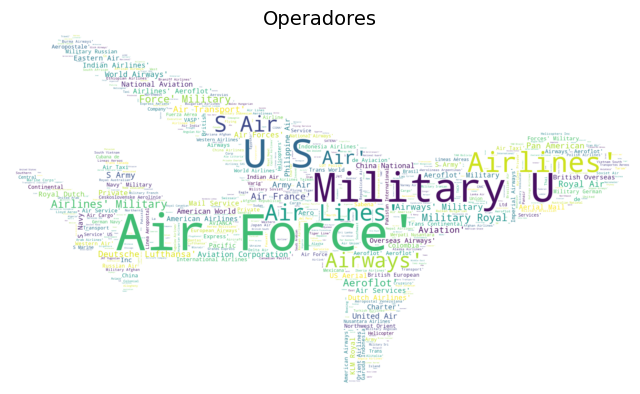

In [32]:

from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = str(dfacc.airline_operator.tolist())
plane_mask = np.array(Image.open('plane.png'))

stopwords = set(STOPWORDS)

contour_color = 'black'
contour_width = 2

wc = WordCloud(background_color="white", max_words=2000, mask=plane_mask,
               stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Operadores', loc='Center', fontsize=14)
plt.show()

Observamos gran presencia de vuelos/operadores militares dentro del campo, ya que observamos palabras como 'Military', 'Air Force', 'Army', entre otras. En virtud de esta conclusión, vamos a clasificar los vuelos en dos categorias, militares y no militares, creando la nueva columna ['category']: 

In [33]:
# Primero tenemos que verificar si las palabras claves están presente en la columna 'airline_operator'
keywords = ['Military', 'Air Force', 'Army']
pattern = '|'.join(keywords)

# Creamos la nueva columna y separamos los vuelos por Militar y No militar
dfacc['category'] = np.where(dfacc['airline_operator'].str.contains('|'.join(keywords), case=False), 'military', 'non-military')

In [34]:
# Verificamos:
df_grouped = dfacc['category'].value_counts()
df_grouped

category
non-military    4217
military         791
Name: count, dtype: int64

#### Flight_no

Ahora seguimos con la columna 'flight_no': 

In [35]:
dfacc['flight_no']

0         ?
1         ?
2         ?
3         ?
4         ?
       ... 
5003      ?
5004      ?
5005      ?
5006      ?
5007    251
Name: flight_no, Length: 5008, dtype: object

In [36]:
count_question_marks = (dfacc['flight_no'] == '?').sum()
count_question_marks

3682

Reemplazamos los valores nulos por un valor vacío y reemplazamos los valores de '?' por un valor vacío:

In [37]:
dfacc['flight_no'] = dfacc['flight_no'].fillna('')

dfacc['flight_no'] = dfacc['flight_no'].str.replace('?', '')

Obtenemos los valores únicos de la columna 'flight_no' y recorremos los valores únicos:


In [38]:
valores_unicos = dfacc['flight_no'].unique()

# Recorremos los valores únicos
for valor in valores_unicos:
    print(valor)


F-AIKG
7
599
6
4
1
14
34
23
15A
LZ 129
2
8
9
229
19
16
21
3
203
5
71
7208
28
V-1104
9035
777
63
218
-
13
161
6001
142
45
216
42
105
16B
6-103
513
878
850
942
404
44
115
140
48
6963
2207
665
521
605
410
121
311
608
1629
923
10
009
572
611
700
4422
1-10
624
343
072
421
331
060
6427
100
897R
557
11-8
537
157
500
307
2501
903
32
245
83
493
129
151
610
615
CAM5763
44-2
501
324
6780
101
4-2
526A
416W
202
251
201
376
841
1-6-6A
470
162
636
783/057
318
18
512
723
627
783
304/44
270
781
314
152
971
633
136
57
792
451
4844-C
329
260
626
591
711
845/26
560
402/46
476
214
24
409
629
17K
976
642
400
253
718 / 2
304
190
701
943
810-9
327
823
411
1800
111
232
844
39
103
285
11
609
543
67
222
736
205
300
607E
258
164
495
466
308
502
601
320
402
75
983
891
514
542
200
1349
1658
315
967
595
371
233
330
2511
20
871
671
710
901
503
207
538
1-11
372
613
698
36
804
830/18
738
375
0005
104
26
081
826/266
S85
651
401
424
548
210
406
897
381
859
511
529
2005
706
201/8
92
153
739/14
7816
56
007
117
902
40
771


En primer lugar, vemos que más del 70% de los valores de la columna eran signos de pregunta, lo cual no representa información alguna. Tampoco estan normalizados los números de vuelo. 
Teniendo en cuenta además que esta columna significaría el número de vuelo (código interno de cada vuelo) y al tener tantos registros faltantes (anteriormente '?'), la columna no nos proporciona mucho valor al análisis que haremos, por lo que creemos que no sería una mala idea eliminarla. Como posiblemente pueda servirnos más adelante en la etapa del dashboard, la dejamos. 

#### Route

Continuamos con el 'análisis' de la columna 'route'. Reemplazamos nulos y signos de pregunta por un valor vacío:

In [39]:
count_question_marks = (dfacc['route'] == '?').sum()
count_question_marks

762

In [40]:
dfacc['route'] = dfacc['route'].fillna('')

dfacc['route'] = dfacc['route'].str.replace('?', '')

Ahora recorremos los valores únicos:

In [41]:
unicos = dfacc['route'].unique()
for i in unicos:
    print(i)

Demonstration
Air show
Test flight

Shuttle
Venice  Taliedo
Paris - Hounslow
Washington - Newark
London - Paris
Warsaw - Prague - Strasbourg - Paris
Geraldton - Derby
Miami - Bimini
Croydon - Le Bourget
Test
Croydon - Paris
Hamburg - Berlin
Strasbourg - Paris
Venice - London
Toulouse - Barcelona - Valencia - Alicante - Malaga - Rabat
Paris - London
Paris - Berck-sur-Mer - Croydon
Croydon - Manchester
Toulon - Algiers
Lympne, England - Rotterdam, The Netherlands
Barranquilla - Bogota
Tiflis - Suchumi
Alicante - Barcelona - Toulouse
Amsterdam - Paris
Oran - Alicante
Toulouse - Barcelona
Lakehurst, NJ - S.t Louis, MO
New York - San Francisco
Paris - Cryodon
Paris - Prague - Budapest
Amsterdam - Rotterdam - Brussels - Paris
Lebourget, France - Croydon, England
New York - Paris
Casablanca -Dakar
Delivery flight
Casablanca - Oran
Charleville - Tambo - Blackall
Kassel - Frankfurt
Croydon - Schiphol
Sightseeing
Old Orchad Beach - Rome
Berlin - Munich
Saint Louis - Dakar
Tallinn - Helsinki
Daka

In [42]:
dfacc.route.nunique()

3838

Observamos más de un valor dentro de las rutas y por ende consideramos que no es posible hacer transformaciones sobre los valores en este paso. No podemos saber en qué tramo ocurrió el accidente y nos quedaremos solamente con el país y la superficie donde ocurrió el mismo, como clasificamos anteriormente.

#### Aircraft_type

Continuamos con la columna 'aircraft_type' (tipo de aeronave/marca). Reemplazamos nulos y signos de pregunta por un valor vacío:

In [43]:
dfacc.aircraft_type.unique()

array(['Wright Flyer III', 'Wright Byplane', 'Dirigible', ...,
       'Eurocopter AS350B3\xa0Ecureuil', 'Beechcraft B300 King Air 350i',
       'Antonov An 26B-100'], dtype=object)

In [44]:
count_question_marks = (dfacc['aircraft_type'] == '?').sum()
count_question_marks

13

In [45]:
dfacc['aircraft_type'] = dfacc['aircraft_type'].fillna('')

dfacc['aircraft_type'] = dfacc['aircraft_type'].str.replace('?', '')

In [46]:
dfacc.aircraft_type.nunique()

2469

Podemos intentar categorizar las aeronaves, según una lista que elaboramos de marcas de aeronaves (50 históricas): 


In [47]:
marcas_aeronaves_historicas = ['Wright Brothers', 'Boeing', 'Airbus', 'Lockheed Martin', 'McDonnell Douglas',
                              'Northrop Grumman', 'Convair', 'Grumman', 'Vickers', 'De Havilland', 'Hawker',
                              'Avro', 'Fokker', 'Junkers', 'Douglas Aircraft Company', 'Cessna', 'Piper Aircraft',
                              'Beechcraft', 'Bell Aircraft Corporation', 'Martin Marietta', 'Fairchild Aircraft',
                              'Bristol Aeroplane Company', 'Handley Page', 'Curtiss-Wright Corporation', 'Saab',
                              'Aérospatiale', 'Tupolev', 'Ilyushin', 'Antonov', 'Yakovlev', 'Sud Aviation',
                              'Dornier', 'Breguet Aviation', 'Messerschmitt', 'Vought', 'Piaggio Aerospace',
                              'Sikorsky Aircraft Corporation', 'Short Brothers', 'Supermarine', 'Avro Canada',
                              'Harbin Aircraft Manufacturing Corporation', 'English Electric',
                              'Mitsubishi Heavy Industries', 'Aichi', 'Nakajima', 'Kawasaki Heavy Industries',
                              'Handley Page', 'Armstrong Whitworth Aircraft', 'Blackburn Aircraft',
                              'Sopwith Aviation Company']

Ahora creamos la funcion para poder comparar los registros de la columna aircraft_type con las marcas que le pasamos, y poder clasificar ese registro en alguna de esas marcas. La función determina también que si no es posible clasificarla en alguna de esas marcas, retorne 'other': 

In [48]:
# Creamos además la columna 'brand' para guardar el registro ya clasificado allí: 
def assign_brand(aircraft_type):
    for brand in marcas_aeronaves_historicas:
        if any(word.lower() in aircraft_type.lower().split() for word in brand.split()):
            return brand
    return 'other'

# Aplicamos la función a la columna 'aircraft_type' para crear la columna 'brand'
dfacc['brand'] = dfacc['aircraft_type'].apply(assign_brand)

Verificamos que nos haya quedado normalizada la columna 'brand':

In [49]:
dfacc.tail(4)

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,total_killed_ground,summary,country,surface,category,brand
5004,2021-05-21,18:00,"Near Kaduna, Nigeria",Military - Nigerian Air Force,,,Beechcraft B300 King Air 350i,11,7,4,11,7,4,0,"While on final approach, in poor weather condi...",Nigeria,ground,military,Beechcraft
5005,2021-06-10,08:00,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,,Naypyidaw - Anisakan,Beechcraft 1900D,14,12,2,12,11,1,0,The plane was carrying military personnel and ...,Myanmar,ground,military,Beechcraft
5006,2021-07-04,,"Patikul, Sulu, Philippines",Military - Philippine Air Force,,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ...",Philippines,ground,military,Lockheed Martin
5007,2021-07-06,15:00,"Palana, Russia",Kamchatka Aviation Enterprise,251,Petropavlovsk - Palana,Antonov An 26B-100,28,22,6,28,22,6,0,The passenger plane crashed into the top of a ...,Russia,ground,non-military,Antonov


#### Total_aboard

Pasamos a la columna 'total_aboard'. Como hicimos previamente en las otras columnas, reemplazamos los valores nulos por un valor vacío y reemplazamos los valores de '?' por un valor vacío. Además, en esta oportunidad, convertimos la columna 'total_abord' a tipo numérico:

In [50]:
dfacc['total_aboard'] = dfacc['total_aboard'].fillna('')

dfacc['total_aboard'] = dfacc['total_aboard'].str.replace('?', '')

dfacc['total_aboard'] = pd.to_numeric(dfacc['total_aboard'], errors='coerce')


In [51]:
dfacc['total_aboard'].unique()

array([  2.,   1.,   5.,  20.,  28.,  41.,  19.,  22.,  23.,  21.,  24.,
        16.,  18.,  nan,  14.,   0.,   8.,   3.,  49.,  45.,   6.,   7.,
        17.,   4.,  11.,  52.,  43.,  15.,  12.,   9.,  13.,  54.,  10.,
        76.,  83.,  50.,  25.,  97.,  29.,  36.,  34.,  37.,  35.,  26.,
        39.,  31.,  27.,  30.,  59.,  44.,  38.,  32.,  42.,  53.,  48.,
        40.,  69.,  33.,  81.,  58.,  55.,  46.,  65.,  51.,  56.,  63.,
        47.,  70.,  57., 115., 129.,  66.,  67.,  74.,  64., 128.,  80.,
        62., 101., 159.,  68.,  79.,  61.,  73.,  99.,  60.,  94.,  72.,
       106.,  78.,  85., 122.,  77.,  88., 119.,  95., 111., 107., 132.,
       112.,  84., 105.,  86., 118.,  87., 103., 127., 153.,  91., 117.,
       133., 124.,  98.,  82.,  90., 130., 102., 155.,  89., 120., 109.,
       100.,  75., 229.,  93., 126., 164., 218., 121.,  92., 104., 156.,
       108., 174., 176., 202., 113., 182., 145., 134., 149., 177., 298.,
       346.,  96., 157., 191., 330., 188., 131., 25

In [52]:
dfacc['total_aboard'].nunique()

244

Ahora, verificamos tanto los registros con 'total_aboard' vacios y también con valor 0: 

In [53]:
filtered_df = dfacc[dfacc['total_aboard'].isna()]
filtered_df

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,total_killed_ground,summary,country,surface,category,brand
26,1919-07-21,16:55,"Chicago, Illinois",Wingfoot Air Express Goodyear Tire,,Shuttle,FD Type Dirigible,NaN,?,?,3,2,1,10,"The dirigible, cruising at 1,200 ft. caught fi...",United States,ground,non-military,other
103,1925-09-07,,"Toul, France",CIDNA,,,Spad 33,NaN,?,?,?,?,?,?,?,France,ground,non-military,other
347,1934-08-10,,"Ningbo, China",China National Aviation Corporation,,,Sikorsky S-38B,NaN,?,?,?,?,?,?,?,China,ground,non-military,Sikorsky Aircraft Corporation
384,1935-08-13,,"Hangow, China",China National Aviation Corporation,,,Sikorsky S-38B,NaN,?,?,?,?,?,?,Destoryed in a storm.,China,ground,non-military,Sikorsky Aircraft Corporation
451,1936-12-26,,"Nanking, China",China National Aviation Corporation,,,Douglas DC-2,NaN,?,?,?,?,?,?,?,China,ground,non-military,McDonnell Douglas
652,1942-10-01,,"Kunming, China",China National Aviation Corporation,,,Douglas C-47,NaN,?,?,?,?,?,?,Crashed while attempting to land after losing ...,China,ground,non-military,McDonnell Douglas
754,1944-11-09,,"Seljord, Norway",Military - U.S. Army Air Corps,,,,NaN,?,?,?,?,?,?,?,Norway,ground,military,other
854,1946-03-18,,"Between Chungking and Shanghai, China",China National Aviation Corporation,,Chunking - Shanghai,,NaN,?,?,?,?,?,?,Disappeared while en route. Plane never located.,China,ground,non-military,other
1231,1951-01-20,,"Huilyo, Peru",Military - TAM,,,Douglas DC-3,NaN,?,?,16,?,?,?,?,Peru,ground,military,McDonnell Douglas
1362,1952-12-22,,"Damascus, Syria",Syrian Air,,,Douglas DC-3,NaN,?,?,9,?,?,?,?,Syria,ground,non-military,McDonnell Douglas


In [54]:
filtered_df = dfacc.loc[dfacc['total_aboard'] == 0]
filtered_df

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,total_killed_ground,summary,country,surface,category,brand
30,1919-10-20,,"English Channel off Forkstone, Kent",Aircraft Transport and Travel,,,De Havilland DH-4,0.0,0,1,0,0,0,0,Crashed into the sea while attempting to land ...,other,water,non-military,De Havilland
120,1927-01-12,,"Estaires, France",Fokker,,Delivery flight,Fokker F-VII,0.0,0,2,0,0,2,0,The flight crew encountered poor weather condi...,France,ground,non-military,Fokker
1121,1949-07-13,,"Jamnagar, Gujarat state, India",Indian Air Force,,Training,Hawker Hunter,0.0,1,1,0,1,1,14,Crashed into a garage near Jamnagar railway st...,India,ground,military,Hawker
3144,1981-09-22,,"Near Babaeski, Turkey",Military - Turkish Air Force,,,Northrop F-5A,0.0,0,0,0,0,0,40,The fighter crashed into a village after the p...,Turkey,ground,military,Northrop Grumman
3376,1986-03-27,,"Bangui, Central African Republic",Military - French Air Force,,,Sepecat Jaguar A,0.0,0,0,0,0,0,35,The jet fighter crashed into a school shortly ...,Central African Republic,ground,military,other


Al ser muy pocos registros en relacion al total de registros, tomamos la decisión de eliminarlos, ya que se trata de una columna muy importante para el posterior análisis, y registros con valores vacios o de valor '0' no nos serían útiles: 

In [55]:
dfacc.total_aboard.isna().sum()

17

In [56]:
dfacc = dfacc.dropna(subset=['total_aboard'])

In [57]:
dfacc = dfacc.drop(dfacc[dfacc['total_aboard'] == 0].index)

In [58]:
dfacc.total_aboard.isna().sum()

0

In [59]:
dfacc.total_aboard.nunique()

243

In [60]:
dfacc.total_aboard.unique()

array([  2.,   1.,   5.,  20.,  28.,  41.,  19.,  22.,  23.,  21.,  24.,
        16.,  18.,  14.,   8.,   3.,  49.,  45.,   6.,   7.,  17.,   4.,
        11.,  52.,  43.,  15.,  12.,   9.,  13.,  54.,  10.,  76.,  83.,
        50.,  25.,  97.,  29.,  36.,  34.,  37.,  35.,  26.,  39.,  31.,
        27.,  30.,  59.,  44.,  38.,  32.,  42.,  53.,  48.,  40.,  69.,
        33.,  81.,  58.,  55.,  46.,  65.,  51.,  56.,  63.,  47.,  70.,
        57., 115., 129.,  66.,  67.,  74.,  64., 128.,  80.,  62., 101.,
       159.,  68.,  79.,  61.,  73.,  99.,  60.,  94.,  72., 106.,  78.,
        85., 122.,  77.,  88., 119.,  95., 111., 107., 132., 112.,  84.,
       105.,  86., 118.,  87., 103., 127., 153.,  91., 117., 133., 124.,
        98.,  82.,  90., 130., 102., 155.,  89., 120., 109., 100.,  75.,
       229.,  93., 126., 164., 218., 121.,  92., 104., 156., 108., 174.,
       176., 202., 113., 182., 145., 134., 149., 177., 298., 346.,  96.,
       157., 191., 330., 188., 131., 258., 154., 64

#### Passengers_aboard y Crew_aboard

Pasamos a las columnas pasajeros ('passengers_aboard') y tripulación 'crew_aboard', donde realizamos en ambas el mismo ejercicio que hicimos previamente. Reemplazamos tanto valores nulos como '?' por valores vacios, y pasamos la columna a tipo numerico:

In [61]:
# Reemplazamos los valores nulos por un valor vacío:
dfacc['passengers_aboard'] = dfacc['passengers_aboard'].fillna('')

# Reemplazamos los valores de ? por un valor vacío:
dfacc['passengers_aboard'] = dfacc['passengers_aboard'].str.replace('?', '')


In [62]:
# Convertimos la columna 'total_abord' a tipo numérico: 
dfacc['passengers_aboard'] = pd.to_numeric(dfacc['passengers_aboard'], errors='coerce')

In [63]:
dfacc.passengers_aboard.isna().sum()

204

In [64]:
dfacc['crew_aboard'] = dfacc['crew_aboard'].fillna('')

dfacc['crew_aboard'] = dfacc['crew_aboard'].str.replace('?', '')

dfacc['crew_aboard'] = pd.to_numeric(dfacc['crew_aboard'], errors='coerce')

In [65]:
dfacc.passengers_aboard.isna().sum()

204

Al verificar que quedaron ambas columnas con la misma cantidad de nulos, verificamos esto filtrando el DataFrame para las filas donde 'passengers_abroad' y 'crew_aboard' son nulos:

In [66]:
filtered_dfacc = dfacc[dfacc['passengers_aboard'].isnull() & dfacc['crew_aboard'].isnull()]
filtered_dfacc

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,total_killed_ground,summary,country,surface,category,brand
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,,,Zeppelin L-1 (airship),20.0,NaN,NaN,14,?,?,0,The airship flew into a thunderstorm and encou...,other,water,military,other
5,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,,,Zeppelin L-2 (airship),28.0,NaN,NaN,28,?,?,0,Hydrogen gas which was being vented was sucked...,Germany,ground,military,other
7,1915-09-03,15:20,"Off Cuxhaven, Germany",Military - German Navy,,,Zeppelin L-10 (airship),19.0,NaN,NaN,19,?,?,0,"Exploded and burned near Neuwerk Island, when...",Germany,ground,military,other
8,1916-07-28,,"Near Jambol, Bulgeria",Military - German Army,,,Schutte-Lanz S-L-10 (airship),20.0,NaN,NaN,20,?,?,0,"Crashed near the Black Sea, cause unknown.",other,ground,military,other
9,1916-09-24,01:00,"Billericay, England",Military - German Navy,,,Zeppelin L-32 (airship),22.0,NaN,NaN,22,?,?,0,Shot down by British aircraft crashing in flames.,England,ground,military,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4786,2010-10-06,,"Rasht Valley, Tajikistan",Military - Tajik National Guard,,,Mi-8,28.0,NaN,NaN,28,?,?,0,The military helicopter crashed after hitting ...,Tajikistan,ground,military,other
4791,2010-11-25,12:07,"Strezhevoy, Russia",NARZ,,,Mil Mi-8T,10.0,NaN,NaN,7,?,?,0,"The helicopter, which was delivering workers t...",Russia,ground,non-military,other
4802,2011-04-19,13:57,"Tawang, India",Pawan Hans Helicopters Ltd.,,,Mil Mi-172,23.0,NaN,NaN,18,?,?,0,The helicopter crashed into a hill as it attem...,India,ground,non-military,other
4813,2011-08-06,,"Tangi Valley, Afghanistan",Military - U.S. Army,,,Boeing CH-47 Chinook,38.0,NaN,NaN,38,?,?,0,"Thirty-eight people, including 31 U.S. special...",Afghanistan,ground,military,Boeing


No haremos modificaciones pero es digno de considerar que probablemente no podamos analizar, para dichos registros, esas características porque tenemos datos faltantes en ambas columnas.

#### Total_fatalities

Pasamos a la columna total fatalidades ('total_fatalities') y realizamos idéntico ejercicio: 

In [67]:
# Reemplazamos los valores nulos y los valores ?: 
dfacc['total_fatalities'] = dfacc['total_fatalities'].fillna('')

dfacc['total_fatalities'] = dfacc['total_fatalities'].str.replace('?', '')

In [68]:
# Convertimos la columna 'total_abord' a tipo numérico:  
dfacc['total_fatalities'] = pd.to_numeric(dfacc['total_fatalities'], errors='coerce')

In [69]:
dfacc.total_fatalities.isna().sum()

0

#### Passengers_Fatalities y Crew_fatalities : creamos columna 'Sobrevivientes'

Pasamos a las columnas fatalidades en pasajeros ('passengers_fatalities') y fatalidades en tripulacion ('crew_aboard'). 

In [70]:
# Reemplazamos los valores nulos por un valor vacío:
dfacc['passengers_fatalities'] = dfacc['passengers_fatalities'].fillna('')

# Reemplazamos los valores de ? por un valor vacío:
dfacc['passengers_fatalities'] = dfacc['passengers_fatalities'].str.replace('?', '')

In [71]:
# Convertimos la columna 'total_abord' a tipo numérico:
dfacc['passengers_fatalities'] = pd.to_numeric(dfacc['passengers_fatalities'], errors='coerce')

In [72]:
dfacc.passengers_fatalities.isna().sum()

221

In [73]:
# Reemplazamos los valores nulos por un valor vacío:
dfacc['crew_fatalities'] = dfacc['crew_fatalities'].fillna('')

# Reemplazamos los valores de ? por un valor vacío:
dfacc['crew_fatalities'] = dfacc['crew_fatalities'].str.replace('?', '')

In [74]:
# Convertimos la columna 'total_abord' a tipo numérico:
dfacc['crew_fatalities'] = pd.to_numeric(dfacc['crew_fatalities'], errors='coerce')

In [75]:
dfacc.crew_fatalities.isna().sum()

220

In [76]:
# Al ser la misma cantidad filtramos el DataFrame para las filas donde 'passengers_fatalities' y 'crew_fatalities' son nulos:
filtered_dfacc = dfacc[dfacc['passengers_fatalities'].isnull() & dfacc['crew_fatalities'].isnull()]
filtered_dfacc

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,total_killed_ground,summary,country,surface,category,brand
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,,,Zeppelin L-1 (airship),20.0,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...,other,water,military,other
5,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,,,Zeppelin L-2 (airship),28.0,NaN,NaN,28,NaN,NaN,0,Hydrogen gas which was being vented was sucked...,Germany,ground,military,other
7,1915-09-03,15:20,"Off Cuxhaven, Germany",Military - German Navy,,,Zeppelin L-10 (airship),19.0,NaN,NaN,19,NaN,NaN,0,"Exploded and burned near Neuwerk Island, when...",Germany,ground,military,other
8,1916-07-28,,"Near Jambol, Bulgeria",Military - German Army,,,Schutte-Lanz S-L-10 (airship),20.0,NaN,NaN,20,NaN,NaN,0,"Crashed near the Black Sea, cause unknown.",other,ground,military,other
9,1916-09-24,01:00,"Billericay, England",Military - German Navy,,,Zeppelin L-32 (airship),22.0,NaN,NaN,22,NaN,NaN,0,Shot down by British aircraft crashing in flames.,England,ground,military,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4813,2011-08-06,,"Tangi Valley, Afghanistan",Military - U.S. Army,,,Boeing CH-47 Chinook,38.0,NaN,NaN,38,NaN,NaN,0,"Thirty-eight people, including 31 U.S. special...",Afghanistan,ground,military,Boeing
4833,2012-03-16,10:45,"Kabul, Afghanistan",Military - Turkish Army (NATO),,,Sikorsky S-70A-28,12.0,NaN,NaN,12,NaN,NaN,4,The helicopter crashed on the outskirts of Kab...,Afghanistan,ground,military,Sikorsky Aircraft Corporation
4848,2012-10-07,12:00,"Near Omdurman, Sudan",Military - Sudanese Air Force,,,Antonov An-12BP,22.0,16.0,6.0,15,NaN,NaN,0,"The transport, carrying military personnel and...",Sudan,ground,military,Antonov
4894,2014-07-07,07:50,"Thach That district, Vietnam",Military - Vietnam People's Army Air Force,,Training,Mil Mi-171,19.0,21.0,2.0,18,NaN,NaN,0,The helicopter crashed about 40 km west of Ha...,Vietnam,ground,military,other


Concluimos que no haremos modificaciones para no alterar la calidad de la información, pero debemos considerar que probablemente no podamos utilizar dichos registros para esas características porque tenemos datos faltantes, de manera similar a como nos ocurrió anteriormente con las columnas 'passengers_aboard' y 'crew_aboard'. 

Pasamos a analizar otro aspecto. Si tenemos la cantidad de personas que iban a bordo de la aeronave en cada uno de los accidentes, y tenemos el numero de fallecidos totales (en ambos conceptos, incluyendo a tripulacion y pasajeros), podemos crear una columna nueva: el número de sobrevivientes. Para eso, hacemos el cálculo:

In [77]:
dfacc['survivors'] = dfacc['total_aboard'] - dfacc['total_fatalities']

In [78]:
dfacc.head()

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,total_killed_ground,summary,country,surface,category,brand,survivors
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,,Demonstration,Wright Flyer III,2.0,1.0,1.0,1,1.0,0.0,0,"During a demonstration flight, a U.S. Army fly...",United States,ground,military,Wright Brothers,1.0
1,1909-09-07,,"Juvisy-sur-Orge, France",,,Air show,Wright Byplane,1.0,0.0,1.0,1,0.0,0.0,0,Eugene Lefebvre was the first pilot to ever be...,France,ground,non-military,Wright Brothers,0.0
2,1912-07-12,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,,Test flight,Dirigible,5.0,0.0,5.0,5,0.0,5.0,0,First U.S. dirigible Akron exploded just offsh...,United States,ground,military,other,0.0
3,1913-08-06,,"Victoria, British Columbia, Canada",Private,,,Curtiss seaplane,1.0,0.0,1.0,1,0.0,1.0,0,The first fatal airplane accident in Canada oc...,Canada,ground,non-military,other,0.0
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,,,Zeppelin L-1 (airship),20.0,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...,other,water,military,other,6.0


In [79]:
dfacc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4986 entries, 0 to 5007
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   4986 non-null   datetime64[ns]
 1   time                   4986 non-null   object        
 2   location               4986 non-null   object        
 3   airline_operator       4986 non-null   object        
 4   flight_no              4986 non-null   object        
 5   route                  4986 non-null   object        
 6   aircraft_type          4986 non-null   object        
 7   total_aboard           4986 non-null   float64       
 8   passengers_aboard      4782 non-null   float64       
 9   crew_aboard            4784 non-null   float64       
 10  total_fatalities       4986 non-null   int64         
 11  passengers_fatalities  4765 non-null   float64       
 12  crew_fatalities        4766 non-null   float64       
 13  total_ki

#### Total_killed_ground

Analizamos la última columna original: total_killed_ground. Reemplazamos nulos y '?' por valores vacios y pasamos a formato numérico.

In [80]:
dfacc['total_killed_ground'] = dfacc['total_killed_ground'].fillna('')

dfacc['total_killed_ground'] = dfacc['total_killed_ground'].str.replace('?', '')

In [81]:
dfacc['total_killed_ground'] = pd.to_numeric(dfacc['total_killed_ground'], errors='coerce')

In [82]:
dfacc['total_killed_ground'].isna().sum()

32

Verificamos todas las columnas nuevamente antes de continuar:

In [83]:
dfacc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4986 entries, 0 to 5007
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   4986 non-null   datetime64[ns]
 1   time                   4986 non-null   object        
 2   location               4986 non-null   object        
 3   airline_operator       4986 non-null   object        
 4   flight_no              4986 non-null   object        
 5   route                  4986 non-null   object        
 6   aircraft_type          4986 non-null   object        
 7   total_aboard           4986 non-null   float64       
 8   passengers_aboard      4782 non-null   float64       
 9   crew_aboard            4784 non-null   float64       
 10  total_fatalities       4986 non-null   int64         
 11  passengers_fatalities  4765 non-null   float64       
 12  crew_fatalities        4766 non-null   float64       
 13  total_ki

### Valores duplicados y valores nulos / Nubes de Palabras


#### Buscamos y corroboramos valores nulos y duplicados:

In [84]:
# Buscamos filas con valores duplicados
duplicados = dfacc[dfacc.duplicated()] 
duplicados

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,total_killed_ground,summary,country,surface,category,brand,survivors


Corroboramos que no existen valores duplicados por lo que no es necesario realizar ninguna acción al respecto. 

In [85]:
dfacc.isna().sum()

date                       0
time                       0
location                   0
airline_operator           0
flight_no                  0
route                      0
aircraft_type              0
total_aboard               0
passengers_aboard        204
crew_aboard              202
total_fatalities           0
passengers_fatalities    221
crew_fatalities          220
total_killed_ground       32
summary                    0
country                    0
surface                    0
category                   0
brand                      0
survivors                  0
dtype: int64

Mostramos el porcentaje de valores nulos que tiene cada columna en relacion al total de registros:

In [86]:
# Calculamos el porcentaje de valores nulos en cada columna
null_percentages = (dfacc.isnull().sum() / len(dfacc)) * 100

# Imprimir los porcentajes de valores nulos
for column, percentage in null_percentages.items():
    if percentage > 0:
        print(f"{column}: El porcentaje de valores nulos es {percentage:.2f}%")


passengers_aboard: El porcentaje de valores nulos es 4.09%
crew_aboard: El porcentaje de valores nulos es 4.05%
passengers_fatalities: El porcentaje de valores nulos es 4.43%
crew_fatalities: El porcentaje de valores nulos es 4.41%
total_killed_ground: El porcentaje de valores nulos es 0.64%


Como se ve, no son representativos en términos proporcionales, pero mantendremos los valores nulos de dichas columnas para no eliminar registros. No obstante, hay que tenerlo en cuenta posteriormente para realizar nuestro análisis.

#### Nubes de palabras

Realizamos una nube de palabras respecto a la columna 'summary' para poder analizar cuales palabras se repiten mas y entonces concluir cuales estarían relacionadas más directamente con el accidente. Ajustamos previamente con 'stopwords' para no mostrar ciertas palabras innecesarias que sabemos que no aportan valor: 

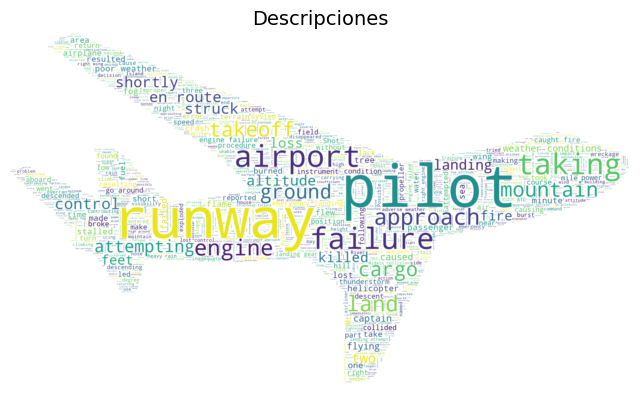

In [87]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = str(dfacc.summary.tolist())
plane_mask = np.array(Image.open('plane.png'))

stopwords = set(STOPWORDS)
stopwords.add('aircraft')
stopwords.add('plane')
stopwords.add('due')
stopwords.add('hit')
stopwords.add('left')
stopwords.add('ft')
stopwords.add('crashed')
stopwords.add('flight')
stopwords.add('accident')
stopwords.add('crew')


wc = WordCloud(background_color="white", max_words=2000, mask=plane_mask,
               stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(8, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Descripciones', loc='Center', fontsize=14)
plt.savefig('./aircraft_wordcloud.png', dpi=50)
plt.show()

Esto nos puede servir posteriormente para realizar análisis más profundos o gráficos. 

### Análisis Descriptivo - Medidas Descriptivas - Outliers

In [88]:
# Verificamos nuevamente las columnas de nuestro dataframe:
dfacc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4986 entries, 0 to 5007
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   4986 non-null   datetime64[ns]
 1   time                   4986 non-null   object        
 2   location               4986 non-null   object        
 3   airline_operator       4986 non-null   object        
 4   flight_no              4986 non-null   object        
 5   route                  4986 non-null   object        
 6   aircraft_type          4986 non-null   object        
 7   total_aboard           4986 non-null   float64       
 8   passengers_aboard      4782 non-null   float64       
 9   crew_aboard            4784 non-null   float64       
 10  total_fatalities       4986 non-null   int64         
 11  passengers_fatalities  4765 non-null   float64       
 12  crew_fatalities        4766 non-null   float64       
 13  total_ki

#### Matriz de Correlación

Procedemos a visualizar una matriz de correlación entre las variables numéricas, para poder entender un poco mejor visualmente como están correlacionadas las variables:

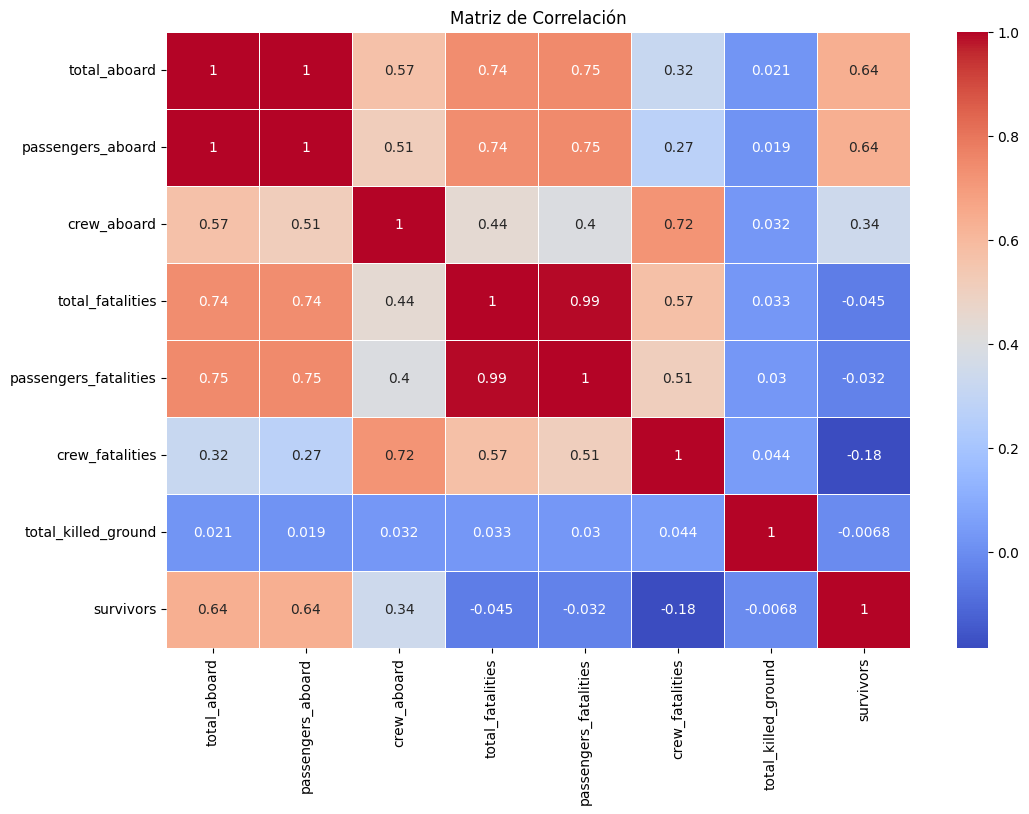

In [89]:
correlation_columns = dfacc[['total_aboard', 'passengers_aboard', 'crew_aboard', 'total_fatalities', 'passengers_fatalities', 'crew_fatalities', 'total_killed_ground', 'survivors']]
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = correlation_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


Impresiones de la matriz:

- Vemos que los valores más altos en la matriz de correlación se dan entre la cantidad de pasajeros a bordo y el total de muertos por accidente, incluyendo tripulación y pasajeros. Estos valores mas altos significan que en el total de muertos por accidente, un gran porcentaje de ese número lo conforman los pasajeros a bordo. 
- Vemos también que en cuanto a sobrevivientes de los accidentes en promedio, tenemos mas cantidad de pasajeros en comparación con miembros de la tripulación. Pero cuidado, esto también se debe a que tenemos más pasajeros en promedio por vuelo, que miembros de tripulación. 
- Además, vemos que en cuanto a total_killed_groud, es decir las personas fallecidas que no viajaban en el avión partícipe del accidente, notamos que el resto de las variables tienen muy poca relación con ella. Esto puede ser porque la variable presenta muchos valores nulos, o porque simplemente, no están relacionadas. Puede ocurrir que poca relación tengan el número de fatalidades de un vuelo, tanto pasajeros como tripulantes, con la cantidad de muertos que ocasionó ese accidente en el lugar del accidente. 

In [90]:
# Además, como ya mostramos anteriormente, pandas nos ofrece mostrar cierta informacion solo utilizando 'describe':
dfacc.describe()

,date,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,total_killed_ground,survivors
count,4986,4986.000000,4782.000000,4784.000000,4986.000000,4765.000000,4766.000000,4954.000000,4986.000000
mean,1971-06-16 18:21:30.974729296,31.152427,26.905270,4.523411,22.341957,18.971459,3.591691,1.701857,8.810469
min,1908-09-17 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1951-06-29 06:00:00,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000,0.000000
50%,1970-10-05 00:00:00,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000,0.000000
75%,1992-04-15 12:00:00,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000,3.750000
max,2021-07-06 00:00:00,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,2750.000000,516.000000
std,NaN,45.492081,44.049904,3.758032,35.035543,34.085492,3.177420,55.546429,30.653307


Acá podemos visualizar ciertos valores y caracteristicas de suma importancia, también teniendo en cuenta la matriz de correlación mostrada:

- Es necesario analizar la capacidad maxima de los aviones, ya que según se pudo averiguar, el promedio máximo de pasajeros que se transportan en un avión es de un poco más de 500 personas. 
- Existen aviones que pueden llevar hasta 800 pasajeros, pero no es lo más común. También hay que tener en cuenta las fechas de todos estos accidentes, ya que la capacidad de los aviones ha variado mucho a lo largo de los años. 
- Asimismo, la tripulación suele ser de un número de 10 personas aproximadamente, entre pilotos, copilotos y asistentes de vuelo, aunque por supuesto siempre varia dependiendo el vuelo y las circunstancias.
- También esta tabla nos permite comparar y analizar las fatalidades, en virtud de los numeros que se proporcionan allí. 

#### Histogramas

Realizamos histogramas para poder conceptualizar las variables visualmente:

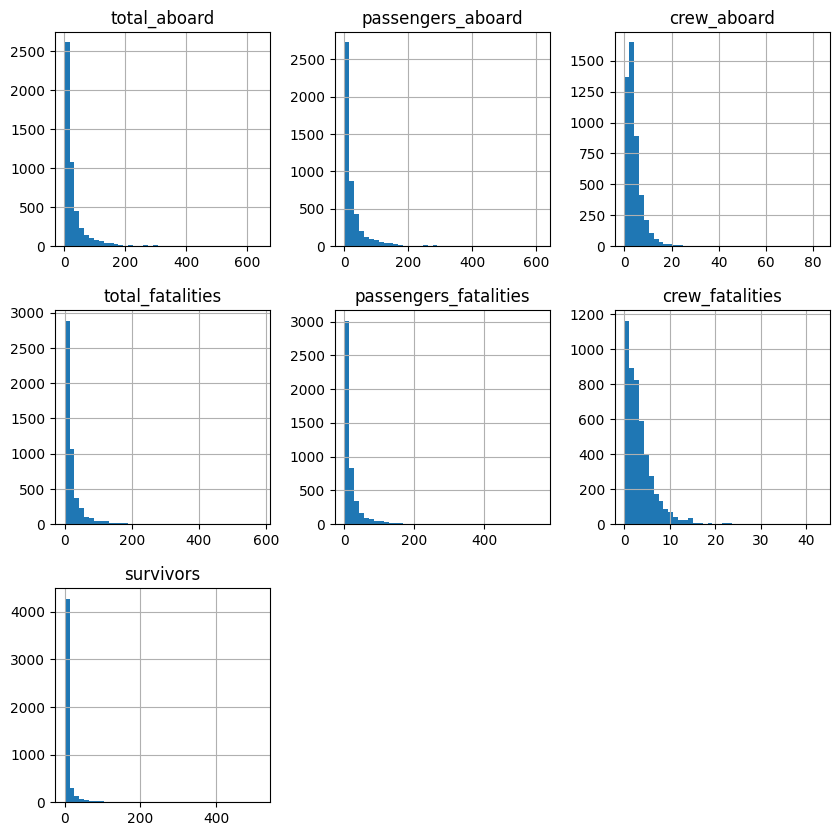

In [91]:
columns = ['total_aboard', 'passengers_aboard', 'crew_aboard', 'total_fatalities', 'passengers_fatalities', 'crew_fatalities', 'survivors']
dfacc[columns].hist(bins=40, figsize= (10, 10))
plt.show()

De esto que visualizamos podemos sacar algunas posibles interpretaciones:
- Mayoría de accidentes con menos personas a bordo: Si la mayoría de los accidentes involucran aeronaves con un número relativamente bajo de personas a bordo y, en consecuencia, menos fatalidades, esto podría sugerir que la mayoría de los vuelos son vuelos comerciales o privados más pequeños con una capacidad limitada de pasajeros. 
Los accidentes con aeronaves más grandes y mayor capacidad de pasajeros podrían ser menos comunes pero más letales cuando ocurren.

- Outliers o eventos excepcionales: Los valores extremadamente altos en el extremo derecho de la distribución podrían corresponder a eventos excepcionales o inusuales, como accidentes graves que involucran grandes aeronaves comerciales con un alto número de pasajeros a bordo.

- Variabilidad en la gravedad de los accidentes: Los accidentes de aviación varían en gravedad, desde incidentes menores hasta desastres catastróficos. Esto podría explicar por qué la distribución está sesgada hacia la derecha, ya que la mayoría de los accidentes son menos graves, pero los pocos accidentes graves tienen un gran impacto en el número total de fatalidades.

#### Outliers:

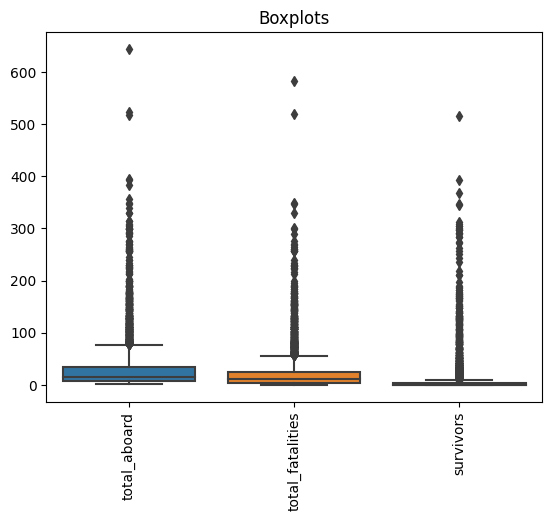

In [92]:
# Graficamos las siguientes variables que podemos utilizar (ya que son aquellas que no tienen valores nulos)

sns.boxplot(data=dfacc[['total_aboard', 'total_fatalities', 'survivors']])
plt.title('Boxplots')
plt.xticks(rotation=90)
plt.show()

Observamos outliers en total_aboard y total_fatalities que son las columnas que nos interesan.

Ahora: filtramos outliers de la columna total_aboard:
- Creamos un diagrama de caja (boxplot) utilizando sns.boxplot para visualizar la distribución de los valores en la columna 'total_aboard'. El boxplot muestra los cuartiles, los valores atípicos potenciales y la dispersión de los datos.

- Luego, se calculan los cuartiles Q1 (primer cuartil) y Q3 (tercer cuartil) utilizando la función np.percentile. Estos cuartiles dividen los datos en cuatro partes iguales.
Establecemos interpolation en 'midpoint', para que se calcule la interpolación lineal para calcular los percentiles, y en el caso de que el valor caiga entre dos puntos de datos, se seleccionará el punto medio entre esos dos valores.

- Se calcula el rango intercuartil (IQR), que es la diferencia entre Q3 y Q1. El IQR se utiliza como medida de dispersión y se usa para identificar valores atípicos.

- Se establecen límites superior e inferior para identificar valores atípicos. Los límites se calculan como Q1 - 1.5 * IQR (límite inferior) y Q3 + 1.5 * IQR (límite superior). Cualquier valor que esté por debajo del límite inferior o por encima del límite superior se considera un valor atípico potencial.

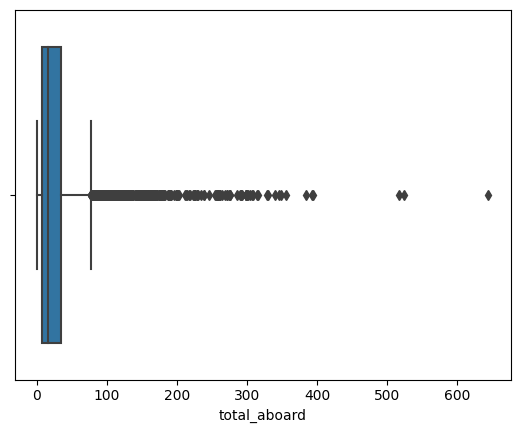

El rango intercuartil (IQR) de total_aboard es 28.0
-35.0 77.0


In [93]:
sns.boxplot(data = dfacc, x = 'total_aboard')
plt.show()

# IQR
Q1 = np.percentile(dfacc['total_aboard'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(dfacc['total_aboard'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(f"El rango intercuartil (IQR) de total_aboard es {IQR}")

lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR

print(lower_lim, upper_lim)



El rango intercuartil (IQR) de 'total_aboard' es igual a 28.0. Entonces como dijimos el IQR nos enseña la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1) y es una medida de la dispersión de los datos. 
En este caso, significa que el 50% central de los datos se encuentra dentro de un rango de 28 unidades en la columna 'total_aboard'.

Además como vemos, cualquier valor en la columna 'total_aboard' que sea menor que -35.0 o mayor que 77.0 se consideraría un valor atípico, basado en este enfoque particular de detección de outliers.

Ahora se filtran los valores del DataFrame que están fuera de los límites definidos y se muestran en el resultado. Esto nos muestra una lista de registros que contienen valores atípicos en la columna 'total_aboard'.

In [94]:
dfacc[(dfacc['total_aboard']<lower_lim) | (dfacc['total_aboard']>upper_lim)]

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,total_killed_ground,summary,country,surface,category,brand,survivors
364,1935-02-12,,"Off Point Sur, Californiia",Military - US Navy,,,Goodyear-Zeppelin U.S.S. Macon (airship),83.0,0.0,83.0,2,0.0,2.0,0.0,The airship suffered structural failure in a s...,other,ground,military,other,81.0
462,1937-05-06,19:25,"Lakehurst, New Jersey",Deutsche Zeppelin Reederei,LZ 129,Frankfurt - Lakehurst N.J.,Zeppelin LZ-129,97.0,36.0,61.0,35,13.0,22.0,1.0,The airship Hindenburg caught fire and burned ...,United States,ground,non-military,other,62.0
1116,1949-06-07,,"San Juan, Puerto Rico",Strato Freight,,San Juan - Miami,Curtiss C-46D-5-CU,81.0,75.0,6.0,53,52.0,1.0,0.0,The aircraft crashed into the Atlantic Ocean d...,Puerto Rico,ground,non-military,other,28.0
1165,1950-03-12,14:50,"Llandow Airport, Cardiff, Wales",Fairflight Ltd.,,Llandow - Dublin,Avro 689 Tudor 5,83.0,78.0,5.0,80,75.0,5.0,0.0,During the approach to Runway 28 at Llandow Ai...,other,ground,non-military,Avro,3.0
1360,1952-12-20,,"Moses Lake, Washington",Military - U.S. Air Force,,,Douglas C-124A Globemaster,115.0,105.0,10.0,87,82.0,5.0,0.0,Within two minutes after takeoff the aircraft ...,United States,ground,military,McDonnell Douglas,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,2020-01-08,06:18,"Near Shahriah, Iran",Ukraine International Airlines,PS752,Tehran - Kiev,Boeing 737-8KV WL,176.0,167.0,9.0,176,167.0,9.0,0.0,The plane took off from Tehran International A...,Iran,ground,non-military,Boeing,0.0
4995,2020-02-05,18:19,"Istanbul, Turkey",Pegasus Airlines,PC2193,Izmir - Istanbul,Boeing 737-86J,177.0,171.0,6.0,3,3.0,0.0,0.0,While landing duriing high winds and heavey ra...,Turkey,ground,non-military,Boeing,174.0
4997,2020-05-22,14:40,"Karachi, Pakistan",Pakistan International Airline,PK8303,Lahore - Karachi,Airbus A320-214,99.0,91.0,8.0,97,89.0,8.0,1.0,"While landing, the aircraft scraped the runway...",Pakistan,ground,non-military,Airbus,2.0
4998,2020-08-07,19:14,"Calicut, India",Air India Exppress,IX344,Dubai - Calicut,Boeing 737-8HG,190.0,184.0,6.0,20,18.0,2.0,0.0,The flight IX344 suffered a runway excursion w...,India,ground,non-military,Boeing,170.0


Tenemos muchos registros, por lo que analizamos la conveniencia de filtrar vuelos de más de 400 personas:

In [95]:
dfacc[(dfacc['total_aboard']>400)]

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,total_killed_ground,summary,country,surface,category,brand,survivors
2902,1977-03-27,17:07,"Tenerife, Canary Islands",Pan American World Airways / KLM,1736/4805,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,644.0,614.0,30.0,583,560.0,23.0,0.0,Both aircraft were diverted to Tenerife becaus...,other,ground,non-military,Boeing,61.0
3341,1985-08-12,18:56,"Mt. Osutaka, near Ueno Village, Japan",Japan Air Lines,123,Tokyo - Osaka,Boeing B-747-SR46,524.0,509.0,15.0,520,505.0,15.0,0.0,The aircraft suffered an aft pressure bulkhead...,Japan,ground,non-military,Boeing,4.0
4219,1999-07-23,11:25,"Tokyo, Japan",All Nippon Airways,61,"Tokyo, Japan - Chitose, Japan",Boeing B-747,517.0,503.0,14.0,1,0.0,1.0,0.0,Two minutes after taking off from Haneda Airpo...,Japan,ground,non-military,Boeing,516.0


Observamos que se trata de datos correctos. 
El primer vuelo de la lista fue un choque entre 2 aviones y por ello la cantidad de personas (estendemos que estarían sumados los 2 vuelos de la colisión).

El segundo y tercer registro también parecer ser correctos, según información encontrada. 

Pasamos a la columna de total_fatalities. Realizamos el mismo análisis según lo que nos muestra el boxplot y analizando el IQR: 

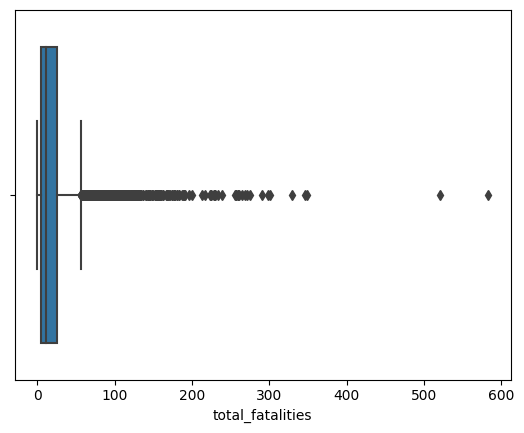

El rango intercuartil (IQR) de total_fatalities es 21.0
-27.5 56.5


In [96]:
sns.boxplot(data = dfacc, x = 'total_fatalities')
plt.show()

# IQR
Q1 = np.percentile(dfacc['total_fatalities'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(dfacc['total_fatalities'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(f"El rango intercuartil (IQR) de total_fatalities es {IQR}")

lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
print(lower_lim, upper_lim)



Mostramos el dataframe filtrado: 

In [97]:
dfacc[(dfacc['total_fatalities']<lower_lim) | (dfacc['total_fatalities']>upper_lim)]

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,total_killed_ground,summary,country,surface,category,brand,survivors
311,1933-04-04,12:30,"Off Barnegat, New Jersey",Military - U.S. Navy,,,Goodyear-Zeppelin U.S.S. Akron (airship),76.0,NaN,NaN,73,NaN,NaN,0.0,"While cruising at 1,600 feet off New Jersey, s...",United States,ground,military,other,3.0
814,1945-10-16,11:30,"Near Peking, China",Military - U.S. Army Air Forces,,Hankou - Peking,Curtiss-Wright C-46F-CU,59.0,55.0,4.0,59,55.0,4.0,0.0,Struck a radio transmission tower while on app...,China,ground,military,Curtiss-Wright Corporation,0.0
1165,1950-03-12,14:50,"Llandow Airport, Cardiff, Wales",Fairflight Ltd.,,Llandow - Dublin,Avro 689 Tudor 5,83.0,78.0,5.0,80,75.0,5.0,0.0,During the approach to Runway 28 at Llandow Ai...,other,ground,non-military,Avro,3.0
1183,1950-06-23,23:25,"Lake Michigan, 18 NNW of Benton Harbor, Michigan",Northwest Orient Airlines,2501,New York City - Minneapolis - Spokan -Seattle,Douglas DC-4,58.0,55.0,3.0,58,55.0,3.0,0.0,"En route from New York to Minneapolis, the air...",United States,ground,non-military,McDonnell Douglas,0.0
1211,1950-11-13,18:00,"Mt. Tete de L'Obiou, France",Curtiss-Reid Flying Services Ltd. (Canada),,Rome - Paris,Douglas C-54B-1-DC,58.0,51.0,7.0,58,51.0,7.0,0.0,The aircraft drifted 50 miles off the prescrib...,France,ground,non-military,McDonnell Douglas,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,2018-10-29,06:31,"Off Jakarta, Indonesia",Lion Air,610,Jakarta - Pangkal Pinang,Boeing 737-MAX 8,189.0,181.0,8.0,189,181.0,8.0,0.0,"The airliner crashed into the Jakarta Sea, 13 ...",Indonesia,ground,non-military,Boeing,0.0
4983,2019-03-10,08:44,"Bishoftu, Ethiopia",Ethiopian Airlines,302,Addis Ababa - Nairobi,Boeing 737 Max 8,157.0,149.0,8.0,157,149.0,8.0,0.0,The internationally scheduled airliner crashed...,Ethiopia,ground,non-military,Boeing,0.0
4994,2020-01-08,06:18,"Near Shahriah, Iran",Ukraine International Airlines,PS752,Tehran - Kiev,Boeing 737-8KV WL,176.0,167.0,9.0,176,167.0,9.0,0.0,The plane took off from Tehran International A...,Iran,ground,non-military,Boeing,0.0
4997,2020-05-22,14:40,"Karachi, Pakistan",Pakistan International Airline,PK8303,Lahore - Karachi,Airbus A320-214,99.0,91.0,8.0,97,89.0,8.0,1.0,"While landing, the aircraft scraped the runway...",Pakistan,ground,non-military,Airbus,2.0


Tenemos el mismo problema que con la columna anterior, nos muestra demasiados registros para poder estudiar puntualmente los outliers. Parece ser, a simple vista, que en estos accidentes todas o casi todas de las personas a bordo del avión (tripulantes + pasajeros), lamentablemente fallecieron (por esta razon aparecerían como outliers).

Entonces filtramos directamente utilizando un concepto razonable, que sería buscar outliers que nos muestren algo que sería imposible: que el número de fatalidades del accidente, sea mayor al numero de personas a bordo del avión (tripulación + pasajeros):

In [98]:
dfacc[dfacc['total_fatalities'] > dfacc['total_aboard']]

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,total_killed_ground,summary,country,surface,category,brand,survivors


Nos muestra un dataframe vacío, entonces podemos continuar concluyendo que no existen inconsistencias en estas columnas. Por ende no tomaremos ninguna acción respecto a los outliers, puesto que son datos válidos para nuestro análisis.

#### Análisis de columnas categóricas y Gráficos


In [99]:
categorical_data = dfacc.select_dtypes(exclude=[np.number])
print('Columnas catégoricas:\n', list(categorical_data.columns))

Columnas catégoricas:
 ['date', 'time', 'location', 'airline_operator', 'flight_no', 'route', 'aircraft_type', 'summary', 'country', 'surface', 'category', 'brand']


Procedemos a realizar ciertos análisis utilizando gráficos de barras y basándonos en las columnas categóricas mencionadas: 

In [100]:
dfacc.info()
print('La cantidad de accidentes analizada en el dataset es de', dfacc.shape[0])

<class 'pandas.core.frame.DataFrame'>
Index: 4986 entries, 0 to 5007
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   4986 non-null   datetime64[ns]
 1   time                   4986 non-null   object        
 2   location               4986 non-null   object        
 3   airline_operator       4986 non-null   object        
 4   flight_no              4986 non-null   object        
 5   route                  4986 non-null   object        
 6   aircraft_type          4986 non-null   object        
 7   total_aboard           4986 non-null   float64       
 8   passengers_aboard      4782 non-null   float64       
 9   crew_aboard            4784 non-null   float64       
 10  total_fatalities       4986 non-null   int64         
 11  passengers_fatalities  4765 non-null   float64       
 12  crew_fatalities        4766 non-null   float64       
 13  total_ki

Aerolíneas: analizamos el operador/aerolínea con mayor número de accidentes. 

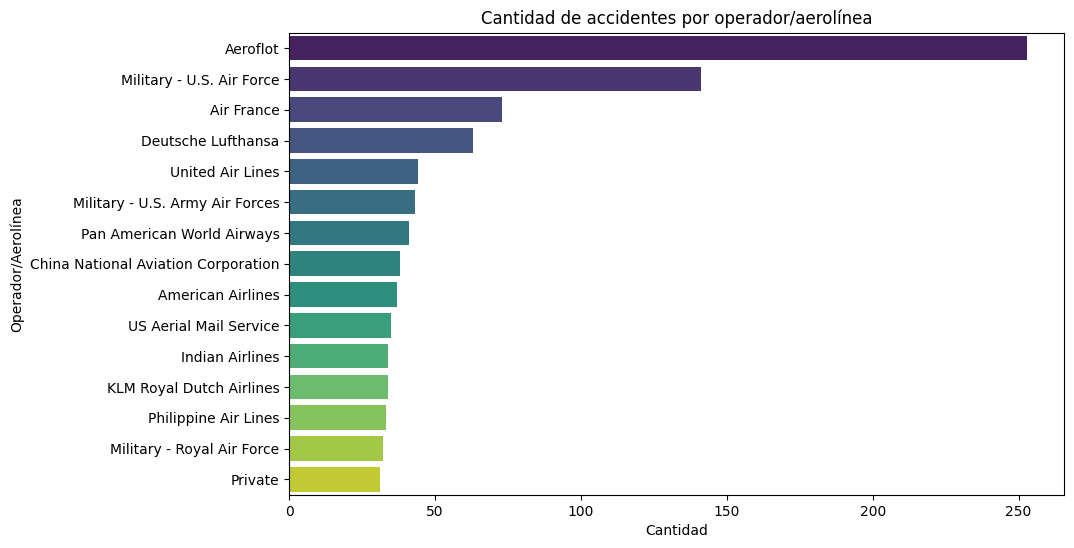

In [101]:
# Calculamos el recuento de accidentes por operador de aerolíneas (tomamos las 15 más representativos)
operator_counts = dfacc['airline_operator'].value_counts().head(15)

# Creamos un DataFrame con los datos de recuento
top_operators = pd.DataFrame({'Operator': operator_counts.index, 'Accident Count': operator_counts.values})

# Creamos el gráfico de columnas horizontales utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Accident Count', y='Operator', data=top_operators, palette='viridis')
plt.title('Cantidad de accidentes por operador/aerolínea')
plt.xlabel('Cantidad')
plt.ylabel('Operador/Aerolínea')
plt.show()

Como se muestra, creamos un nuevo dataframe utilizando un diccionario. El diccionario tiene dos claves: 'Operator' y 'Accident Count'. 'Operator' toma los índices de 'operator_counts', que son los nombres de los operadores de aerolíneas, y 'Accident Count' toma los valores de 'operator_counts', que son los recuentos de accidentes para cada operador.

Esto crea un DataFrame que muestra los operadores de aerolíneas más representativos junto con la cantidad de accidentes que han tenido.

Traemos ese dataframe: 

In [102]:
top_operators

,Operator,Accident Count
0,Aeroflot,253
1,Military - U.S. Air Force,141
2,Air France,73
3,Deutsche Lufthansa,63
4,United Air Lines,44
5,Military - U.S. Army Air Forces,43
6,Pan American World Airways,41
7,China National Aviation Corporation,38
8,American Airlines,37
9,US Aerial Mail Service,35


Tanto en el gráfico como en el dataframe, podemos observar que Aeroflot tiene la mayor cantidad de accidentes aéreos.

Analizamos ahora los países con la mayor cantidad de accidentes, para poder mostrar además el país que más accidentes registra.

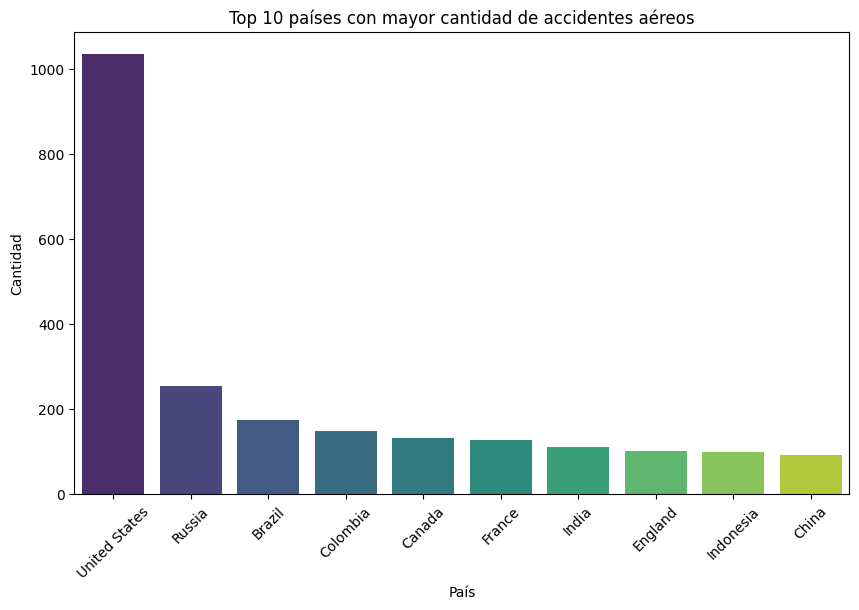

In [103]:
# Filtramos los datos para excluir la categoría 'other'
filtered_data = dfacc[dfacc['country'] != 'other']

# Calculamos el recuento de accidentes por país (tomamos los 10 más representativos)
country_counts = filtered_data['country'].value_counts().head(10)

# Creamos un DataFrame con los datos de recuento
top_countries = pd.DataFrame({'Country': country_counts.index, 'Accident Count': country_counts.values})

# Creamos el gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Accident Count', data=top_countries, palette='viridis')
plt.title('Top 10 países con mayor cantidad de accidentes aéreos')
plt.xlabel('País')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

Como hicimos anteriormente, creamos un diccionario con los nombres de los países y el recuento. Estados Unidos resulta entonces el país que más accidentes registra históricamente, en contraste con lo mostrado en el apartado anterior donde vimos que la Aeroflot tiene la mayor cantidad de accidentes aéreos, siendo una aerolínea Rusa. 

Ahora, visualizamos lo mismo pero en el formato de dataframe: 

In [104]:
top_countries

,Country,Accident Count
0,United States,1034
1,Russia,255
2,Brazil,175
3,Colombia,150
4,Canada,133
5,France,127
6,India,111
7,England,101
8,Indonesia,99
9,China,92


Analizamos la cantidad de accidentes según el tipo de aeronave: 

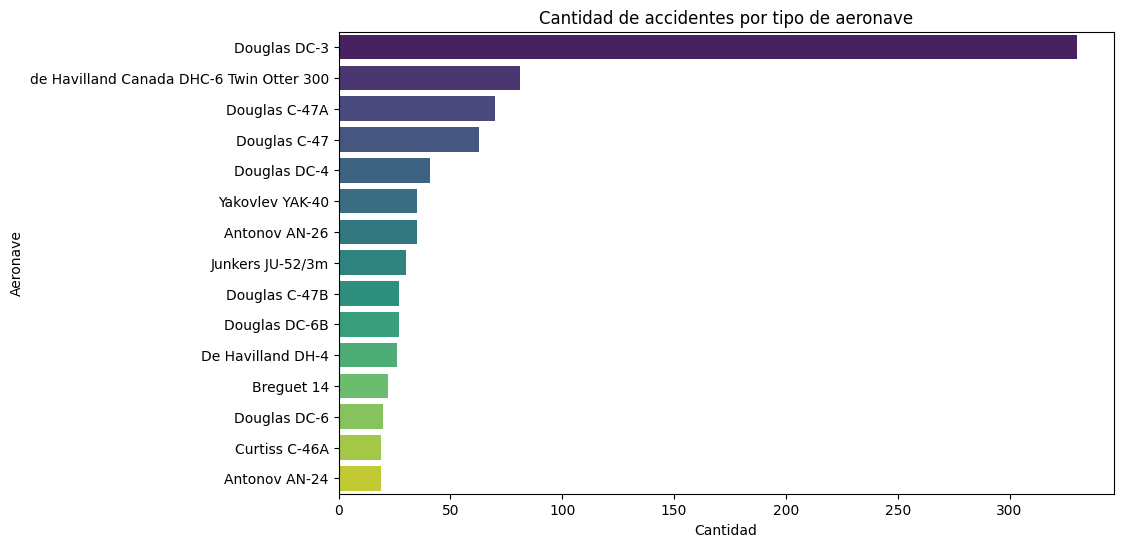

In [105]:
# Recontamos accidentes según el tipo de aeronave (hacemos un top 15)
operator_counts = dfacc['aircraft_type'].value_counts().head(15)

# Creamos un DataFrame con los datos de recuento, al igual que hicimos anteriormente: 
top_aircrafts = pd.DataFrame({'Aircraft': operator_counts.index, 'Accident Count': operator_counts.values})

# Creamos el gráfico de columnas horizontales utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Accident Count', y='Aircraft', data=top_aircrafts, palette='viridis')
plt.title('Cantidad de accidentes por tipo de aeronave')
plt.xlabel('Cantidad')
plt.ylabel('Aeronave')
plt.show()

In [106]:
# Vemos los resultados :

top_aircrafts

,Aircraft,Accident Count
0,Douglas DC-3,330
1,de Havilland Canada DHC-6 Twin Otter 300,81
2,Douglas C-47A,70
3,Douglas C-47,63
4,Douglas DC-4,41
5,Yakovlev YAK-40,35
6,Antonov AN-26,35
7,Junkers JU-52/3m,30
8,Douglas C-47B,27
9,Douglas DC-6B,27


Observamos que el Douglas DC-3 es la aeronave con mayor cantidad de accidentes. Pero al observar muchos aviones de la marca, realizaremos en profundidad un análisis detallado por cada marca, para identificar el patrón existente. 

Analizamos entonces ahora las marcas con más accidentes:

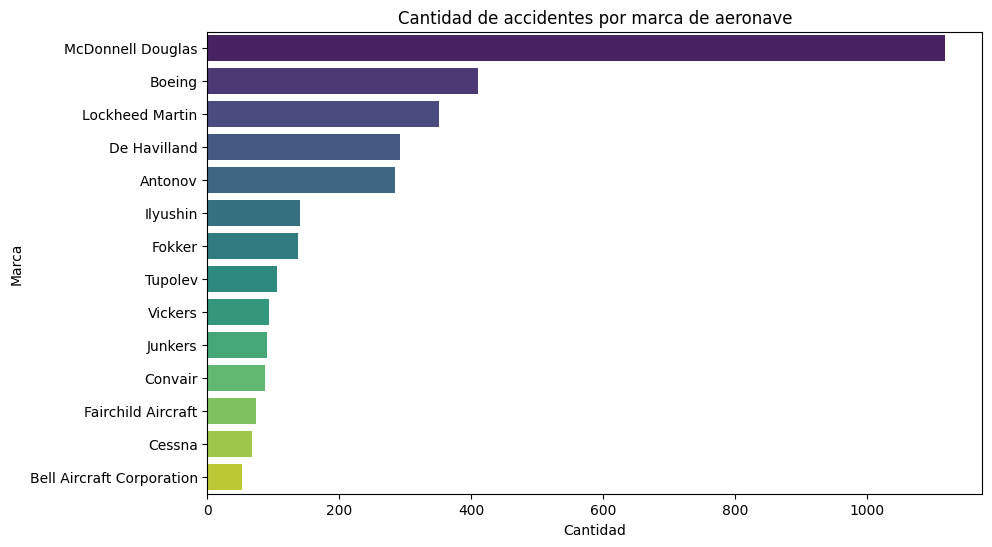

In [107]:
# Utilizamos el mismo código base que veniamos utilizando:

# Contamos los accidentes por marca (tomamos el top 15):
operator_counts = dfacc['brand'].value_counts().head(15)

# Filtramos 'other' del recuento:
operator_counts = operator_counts[operator_counts.index != 'other']

# Creamos un DataFrame con los datos de recuento (utilizando un diccionario):
top_brands = pd.DataFrame({'Brand': operator_counts.index, 'Accident Count': operator_counts.values})

# Creamos el gráfico de columnas horizontales utilizando Seaborn:
plt.figure(figsize=(10, 6))
sns.barplot(x='Accident Count', y='Brand', data=top_brands, palette='viridis')
plt.title('Cantidad de accidentes por marca de aeronave')
plt.xlabel('Cantidad')
plt.ylabel('Marca')
plt.show()

In [108]:
# Analizamos en formato dataframe: 
top_brands

,Brand,Accident Count
0,McDonnell Douglas,1119
1,Boeing,410
2,Lockheed Martin,351
3,De Havilland,292
4,Antonov,285
5,Ilyushin,140
6,Fokker,137
7,Tupolev,105
8,Vickers,93
9,Junkers,91


Podemos decir que se mantiene el patrón antes visualizado y que los aviones Douglas resultaron, a lo largo de la historia, los aviones con más cantidad de siniestros.
Pero por otro lado, según hemos averiguado, el fabricante de aviones Douglas Aircraft Company (conocido comúnmente como Douglas) dejó de existir como entidad independiente en 1967. 
En ese año, se fusionó con McDonnell Aircraft Corporation para formar McDonnell Douglas Corporation. 
A su vez, McDonnell Douglas fue adquirida por The Boeing Company en 1997.

En conclusión, tanto McDonell, Douglas y Boeing, han estado relacionados a lo largo de los ultimos 60-70 años y podemos decir que han presentado un elevado número de siniestros comparados con el resto de las marcas. 

Analizamos ahora los accidentes por categoría: 

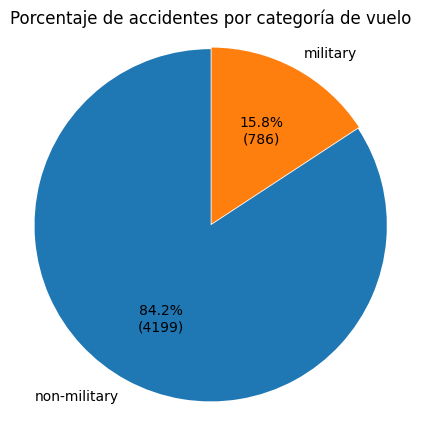

In [109]:
# Calculamos el recuento de accidentes por categoría:
category_counts = dfacc['category'].value_counts()

explode = (0.009, 0.001)

# Teniendo en cuenta que son solamente dos categorias, optamos por mostrar la información en un gráfico circular (pie chart):
plt.figure(figsize=(5, 5))
plt.pie(category_counts, labels=category_counts.index, autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*category_counts.sum())})', startangle=90, explode=explode)
plt.title('Porcentaje de accidentes por categoría de vuelo')
plt.axis('equal')
plt.show()

In [110]:
# Observamos la variable: 
category_counts

category
non-military    4200
military         786
Name: count, dtype: int64

Vemos entonces que los vuelos de la categoría 'no-militar' poseen muchos más accidentes en proporción a los accidentes de la categoría militar. 

Analizamos Fatalidades - Vuelo con mayor número de fatalidades y explicación del suceso: 

In [111]:
# Con esta línea calculamos el índice del vuelo que tiene el mayor número de fatalidades:
indice_max_fatalidades = dfacc['total_fatalities'].idxmax()

# Aquí se obtiene el número de vuelo correspondiente al índice calculado en el paso anterior, la descripción del suceso 
# relacionado con el vuelo que tuvo el mayor número de fatalidades, el número de fatalidades en ese vuelo y su operador:
num_vuelo_max_fatalidades = dfacc.loc[indice_max_fatalidades, 'flight_no']
descripcion_suceso_max_fatalidades = dfacc.loc[indice_max_fatalidades, 'summary']
num_fatalidades_max_fatalidades = dfacc.loc[indice_max_fatalidades, 'total_fatalities']
operador_max_fatalidades = dfacc.loc[indice_max_fatalidades, 'airline_operator']

# Imprimimos los resultados:
print("Número de vuelo con mayor número de fatalidades:", num_vuelo_max_fatalidades)
print("Operador involucrado:", operador_max_fatalidades)
print("Número de fatalidades:", num_fatalidades_max_fatalidades)
print("Descripción de lo sucedido:", descripcion_suceso_max_fatalidades)

Número de vuelo con mayor número de fatalidades: 1736/4805
Operador involucrado: Pan American World Airways / KLM
Número de fatalidades: 583
Descripción de lo sucedido: Both aircraft were diverted to Tenerife because of a bombing at Las Palmas Airport. After an extended delay,  both planes were instructed to back track up the runway. The KLM plane reached its takeoff point while the Pan Am plane was still on the runway. The Pan Am plane continued up the runway missing the taxiway turnout. There was heavy fog on the runway. The KLM plane began its takeoff roll without permission with the Pan Am plane still on the runway. The controller and Pan Am pilot each radioed a warning to the KLM plane, but were not heard because the simultaneous transmissions interfered with each other.The KLM plane hit the Pan Am plane just as it was taking off. Both planes burst into flames.  KLM 234 + 14 crew,  Pan Am 326 + 9 crew killed. All aboard the KLM plane were killed. The KLM captain was their safety o

Operador con mayor número de fatalidades: 

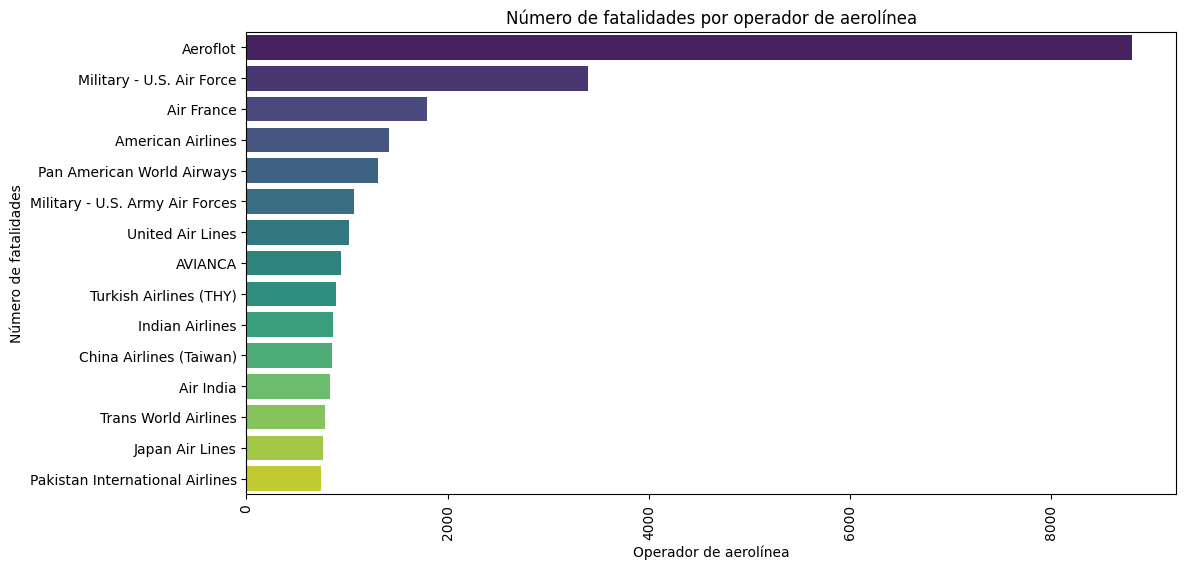

In [112]:
# Agrupamos por operador utilizando 'groupby': 
fatalities_by_operator = dfacc.groupby('airline_operator')['total_fatalities'].sum().reset_index()

# Ordenamos en forma descendente y tomamos los 15 con mayor cantidad: 
fatalities_by_operator = fatalities_by_operator.nlargest(15, 'total_fatalities')

# Graficamos utilizando un grafico de barras:
plt.figure(figsize=(12, 6))
sns.barplot(y='airline_operator', x='total_fatalities', data=fatalities_by_operator, palette='viridis')
plt.xlabel('Operador de aerolínea')
plt.ylabel('Número de fatalidades')
plt.title('Número de fatalidades por operador de aerolínea')
plt.xticks(rotation=90)
plt.show()

In [113]:
# Observamos los valores
fatalities_by_operator

,airline_operator,total_fatalities
80,Aeroflot,8802
1399,Military - U.S. Air Force,3395
188,Air France,1797
353,American Airlines,1422
1594,Pan American World Airways,1303
1409,Military - U.S. Army Air Forces,1070
2143,United Air Lines,1019
22,AVIANCA,941
2108,Turkish Airlines (THY),890
974,Indian Airlines,860


Visualizamos que Aeroflot es la aerolinea con la mayor cantidad de fatalidades. 

Ahora, analizamos las aeronaves según la cantidad de fatalidades. Podremos visualizar que aeronave tuvo la mayor cantidad de fatalidades a lo largo de la historia: 

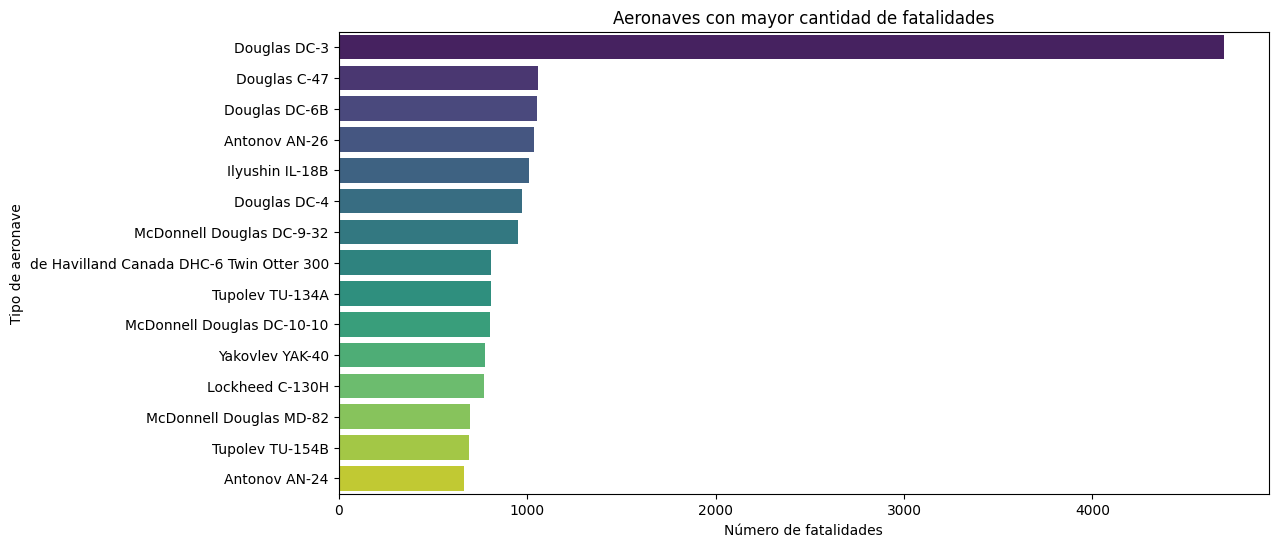

In [114]:
# Agrupamos por tipo de aeronave utilizando 'groupby'
fatalities_by_aircraft = dfacc.groupby('aircraft_type')['total_fatalities'].sum().reset_index()

# Ordenamos en forma descendente y tomamos los 15 con mayor cantidad:
top_aircraft_fatalities = fatalities_by_aircraft.nlargest(15, 'total_fatalities')

# Graficamos también utilizando un gráfico de barras:
plt.figure(figsize=(12, 6))
sns.barplot(x='total_fatalities', y='aircraft_type', data=top_aircraft_fatalities, palette='viridis')
plt.xlabel('Número de fatalidades')
plt.ylabel('Tipo de aeronave')
plt.title('Aeronaves con mayor cantidad de fatalidades')
plt.show()

In [115]:
top_aircraft_fatalities

,aircraft_type,total_fatalities
1129,Douglas DC-3,4699
1030,Douglas C-47,1059
1198,Douglas DC-6B,1051
143,Antonov AN-26,1038
1547,Ilyushin IL-18B,1008
1181,Douglas DC-4,972
1886,McDonnell Douglas DC-9-32,953
2396,de Havilland Canada DHC-6 Twin Otter 300,810
2225,Tupolev TU-134A,807
1850,McDonnell Douglas DC-10-10,804


Como pudimos ver anteriormente, el avión Douglas DC-3 es el que tuvo mayor cantidad de accidentes, y como vemos aquí también fue el que tuvo más cantidad de fatalidades.

Analizamos el mismo concepto pero ahora segmentando por Marca: 

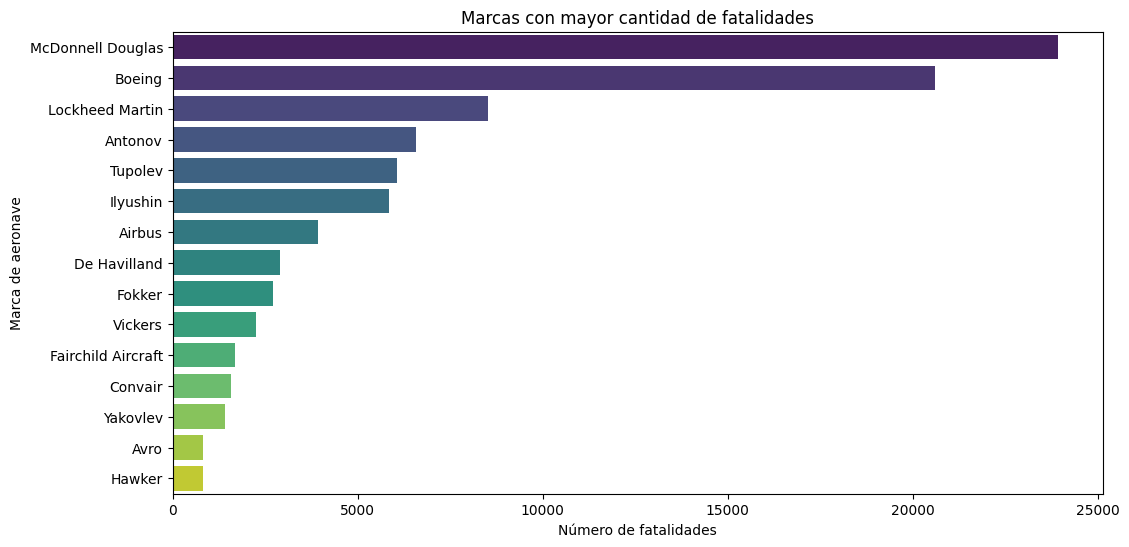

In [116]:
# Filtramos 'other' del recuento, para poder ser mas preciso en la gráfica:
data_filtered = dfacc[dfacc['brand'] != 'other']

# Agrupamos por tipo de marca utilizando 'groupby' (reseteamos el índice para que nuestro dataframe tenga un índice nuevo adecuado):
fatalities_by_brand = data_filtered.groupby('brand')['total_fatalities'].sum().reset_index()

# Ordenamos en forma descendente y tomamos los 15 con mayor cantidad:
top_brand_fatalities = fatalities_by_brand.nlargest(15, 'total_fatalities')

# Graficamos utilizando gráfico de barras: 
plt.figure(figsize=(12, 6))
sns.barplot(x='total_fatalities', y='brand', data=top_brand_fatalities, palette='viridis')
plt.xlabel('Número de fatalidades')
plt.ylabel('Marca de aeronave')
plt.title('Marcas con mayor cantidad de fatalidades')
plt.show()


In [117]:
# Mostramos el dataframe creado y con nuestro top 15: 
top_brand_fatalities 

,brand,total_fatalities
25,McDonnell Douglas,23945
8,Boeing,20614
24,Lockheed Martin,8515
1,Antonov,6573
37,Tupolev,6064
21,Ilyushin,5843
0,Airbus,3922
14,De Havilland,2909
17,Fokker,2701
38,Vickers,2252


Al igual que en el análisis de las fatalidades por aeronave, observamos que Douglas presenta la mayor cantidad de fatalidades. 

Analizamos las aerolineas que, a pesar de los accidentes, tuvieron alto número de sobrevivientes: 

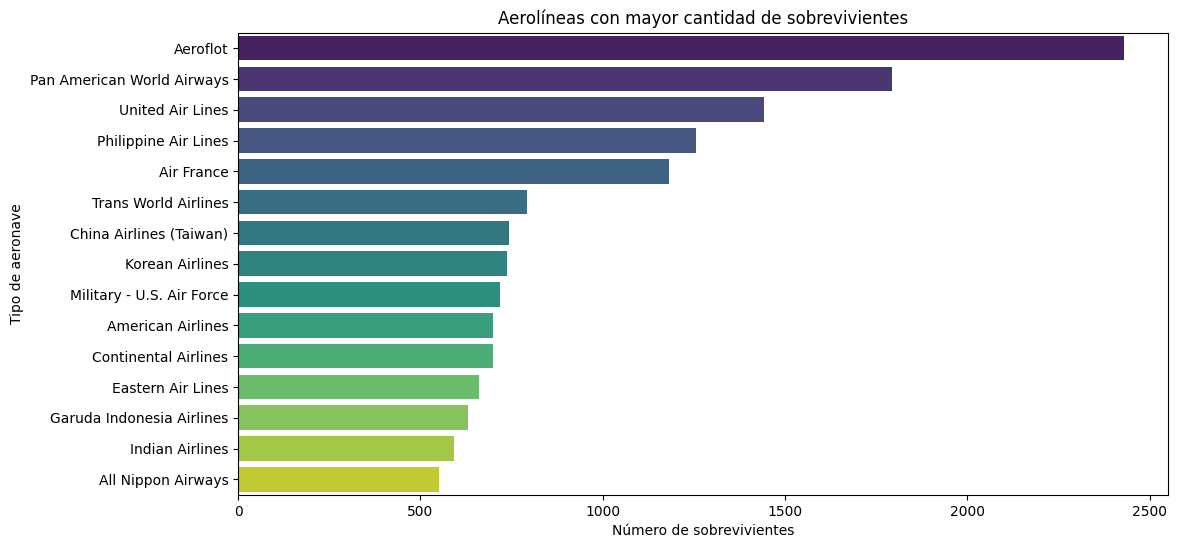

In [118]:
# Calculamos los sobrevivientes por aeronave
survivors_by_airline = dfacc.groupby('airline_operator')['survivors'].sum().reset_index()

# Dejamos solamente las 15 con más sobrevivientes:
top_airline_survivors = survivors_by_airline.nlargest(15, 'survivors')

# Graficamos: 
plt.figure(figsize=(12, 6))
sns.barplot(x='survivors', y='airline_operator', data=top_airline_survivors, palette='viridis')
plt.xlabel('Número de sobrevivientes')
plt.ylabel('Tipo de aeronave')
plt.title('Aerolíneas con mayor cantidad de sobrevivientes')
plt.show()

In [119]:
top_airline_survivors

,airline_operator,survivors
80,Aeroflot,2429.0
1594,Pan American World Airways,1794.0
2143,United Air Lines,1442.0
1639,Philippine Air Lines,1256.0
188,Air France,1181.0
2051,Trans World Airlines,793.0
625,China Airlines (Taiwan),743.0
1065,Korean Airlines,737.0
1399,Military - U.S. Air Force,718.0
353,American Airlines,700.0


Vemos que Aeroflot, si bien es la aerolinea/operador que mayor cantidad de accidentes y mayor cantidad de fatalidades registró, también fue la que más sobrevivientes tuvo. Este es un buen dato a tener en cuenta, a la hora de ponderar las 3 variables. 

### Análisis Temporal

Traemos el primer y último vuelo del dataset para entender que fechas comprenden los accidentes de nuestro dataframe:

In [120]:
# Obtenemos el vuelo más antiguo y traemos su información relacionada:
vuelo_mas_antiguo = dfacc[dfacc['date'] == dfacc['date'].min()]
num_vuelo_antiguo = vuelo_mas_antiguo['flight_no'].values[0]
operador_antiguo = vuelo_mas_antiguo['airline_operator'].values[0]
fecha_antigua = vuelo_mas_antiguo['date'].values[0]

# Obtenemos el vuelo más reciente y traemos su información relacionada:
vuelo_mas_reciente = dfacc[dfacc['date'] == dfacc['date'].max()]
num_vuelo_reciente = vuelo_mas_reciente['flight_no'].values[0]
operador_reciente = vuelo_mas_reciente['airline_operator'].values[0]
fecha_reciente = vuelo_mas_reciente['date'].values[0]

# Imprimimos los resultados según cada variable:
print("Vuelo más antiguo:")
print("Número de vuelo:", num_vuelo_antiguo)
print("Operador de la aerolínea:", operador_antiguo)
print("Fecha:", fecha_antigua)
print()
print("Vuelo más reciente:")
print("Número de vuelo:", num_vuelo_reciente)
print("Operador de la aerolínea:", operador_reciente)
print("Fecha:", fecha_reciente)

Vuelo más antiguo:
Número de vuelo: 
Operador de la aerolínea: Military - U.S. Army
Fecha: 1908-09-17T00:00:00.000000000

Vuelo más reciente:
Número de vuelo: 251
Operador de la aerolínea: Kamchatka Aviation Enterprise
Fecha: 2021-07-06T00:00:00.000000000


#### Analizamos por distintos tipos de jerarquía de fechas

Años: top 10 de años según cantidad de accidentes en ese año

In [121]:
# Extraemos el año de la columna 'date'
dfacc['year'] = pd.to_datetime(dfacc['date']).dt.year

# Agrupamos por año y contamos la cantidad de accidentes
accidents_by_year = dfacc.groupby('year').size().reset_index(name='accident_count')

# Ordenamos el DataFrame por la columna 'Cantidad de accidentes' de forma descendente
top_10_years = accidents_by_year.sort_values(by='accident_count', ascending=False).head(10)

# Mostramos el DataFrame con el top 10 de años ordenados por cantidad de accidentes
print(top_10_years.to_string(index=False))

 year  accident_count
 1946              87
 1947              82
 1989              82
 1948              78
 1962              78
 1972              77
 1945              75
 1951              74
 1994              74
 1970              73


Vuelos en los últimos años:

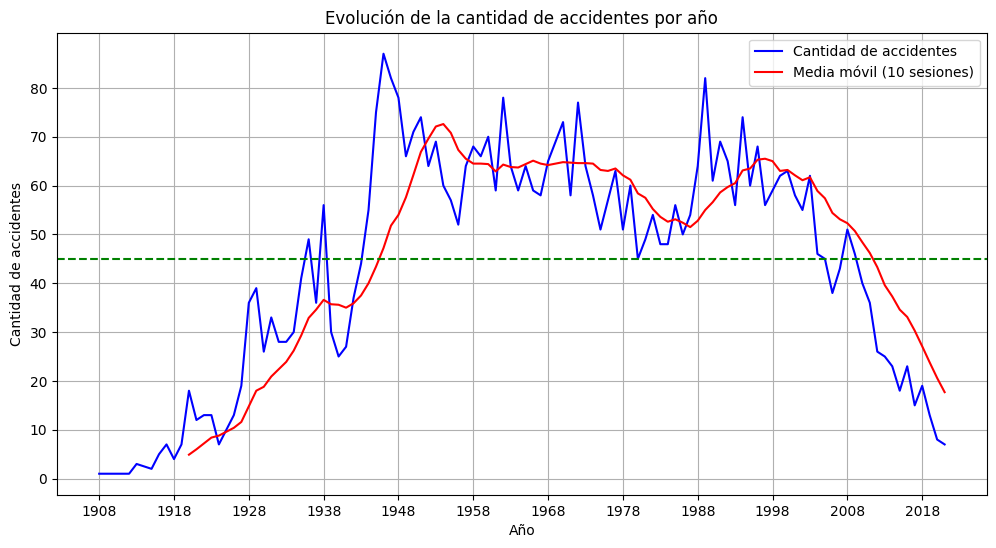

In [122]:
# Agrupamos por año (ya lo extraimos previamente en el apartado anterior) y contamos la cantidad de accidentes por año, para luego guardarlo en un dataframe: 
accidents_by_year = dfacc.groupby('year').size().reset_index(name='Cantidad de accidentes')

# Media móvil: Se calcula la media móvil de 10 sesiones (o períodos) para suavizar las fluctuaciones a lo largo del tiempo. 
# Esto se hace mediante el método rolling(window=10).mean(), que calcula la media de los últimos 10 valores en cada punto de datos.
accidents_by_year['Media móvil'] = accidents_by_year['Cantidad de accidentes'].rolling(window=10).mean()


# Calculamos la media total de los accidentes para mostrarlo como una referencia mas global:
media_total_accidentes = accidents_by_year['Cantidad de accidentes'].mean()


# Creamos el gráfico de líneas a lo largo del tiempo:
plt.figure(figsize=(12, 6))
sns.lineplot(data=accidents_by_year, x='year', y='Cantidad de accidentes', color='blue', label='Cantidad de accidentes')
sns.lineplot(data=accidents_by_year, x='year', y='Media móvil', color='red', label='Media móvil (10 sesiones)')

# Establecemos separación del eje x cada 10 años: 
plt.xticks(range(min(accidents_by_year['year']), max(accidents_by_year['year'])+1, 10))

# Establecemos separación del eje y cada 10 unidades: 
plt.yticks(range(0, max(accidents_by_year['Cantidad de accidentes'])+1, 10))

# Mostramos gridlines para darle mayor claridad visual:
plt.grid(True)

# Establecemos etiquetas de los ejes:
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')

# Establecemos título del gráfico: 
plt.title('Evolución de la cantidad de accidentes por año')

# Dibuja una línea horizontal de color verde en la posición de la media total, para tener más referencia:
plt.axhline(y=media_total_accidentes, color='green', linestyle='--', label='Media Total')

# Mostramos el gráfico:
plt.show()


Podemos observar que a partir de 1908 la tendencia comenzó fuertemente alcista hasta llegar a 1946 donde tuvimos el máximo histórico. La tendencia marcó una consolidación entre 1946 y el año 2000, con máximos entre 70 y 80 en cuanto al número de accidentes. 

Finalmente, comienza una tendencia a la baja a partir de 1990.
Para los últimos años del dataset, desde 2018 en adelante, la cantidad de accidentes se encuentra en mínimos históricos. 


La media móvil de 10 años resulta un factor importante a considerar, puesto que todas las veces que hemos estado por encima de la misma, los accidentes logicamente han sido altos en cantidad.


Además, la línea verde del promedio total (es decir contabilizando todos los años de principio a fin), nos da un parámetro de como ha evolucionado esto desde mínimos historicos, bien lejos de ese valor a principios del siglo XX, pasando a superarlo por muchísima diferencia a partir de la decada del 30', para luego volver a alejarse de esa referencia en los últimos años, época en que ha habido muy baja cantidad de accidentes. 

Datos de color: Meses históricos y días de la semana históricos con mayor cantidad de accidentes

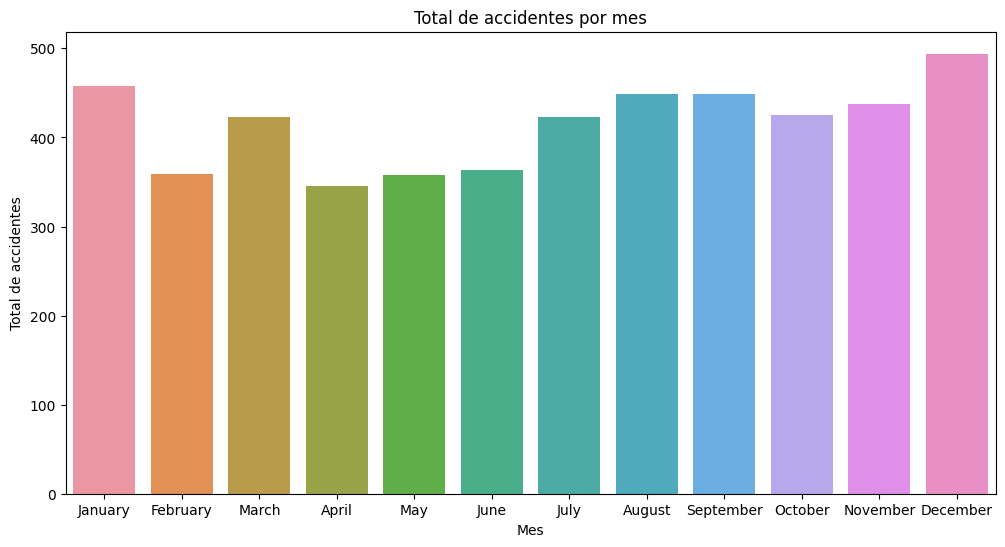

In [123]:
import calendar

# Extraemos el mes de la columna 'date'
dfacc['month'] = pd.to_datetime(dfacc['date']).dt.month

# Obtenemos los nombres de los meses
dfacc['month'] = dfacc['month'].apply(lambda x: calendar.month_name[x])

# Agrupamos por mes y contamos la cantidad de accidentes
accidents_by_month = dfacc.groupby('month').size().reset_index(name='accident_count')

# Ordenamos los meses de forma cíclica
months_order = list(calendar.month_name)[1:]  # Lista de nombres de los meses sin el primer elemento (vacío)
accidents_by_month['month'] = pd.Categorical(accidents_by_month['month'], categories=months_order, ordered=True)
accidents_by_month = accidents_by_month.sort_values('month')

# Creamos el gráfico de barras con Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=accidents_by_month, x='month', y='accident_count')

# Establecemos etiquetas de los ejes
plt.xlabel('Mes')
plt.ylabel('Total de accidentes')

# Establecemos título en el gráfico
plt.title('Total de accidentes por mes')

# Mostramos el gráfico
plt.show()

In [124]:
df_month = accidents_by_month.sort_values('accident_count', ascending = False)
df_month

,month,accident_count
2,December,494
4,January,458
1,August,449
11,September,449
9,November,438
10,October,425
7,March,423
5,July,423
6,June,364
3,February,359


In [125]:
df_month.describe()

,accident_count
count,12.000000
mean,415.500000
std,47.580554
min,346.000000
25%,362.750000
50%,424.000000
75%,449.000000
max,494.000000


Podemos ver que el mes de mayor cantidad de accidentes fue Diciembre con 494. 
Históricamente los meses tienen cantidades similares y los datos no están muy disperos entre sí. Esto no nos muestra información que sea relevante a los fines práticos ya que como dijimos, las columnas están muy parejas y no hay demasiada dispersión entre los datos. 

Siempre es positivo visualizarlo con colores para poder ver las diferencias y, quizás, si hubiera habido un poco mas de dispersión, poder analizar por ejemplo los meses donde ha habido mas accidentes comparados con otros, luego compararlo con la localizacion de esos accidentes en particular y poder entender que quizás pudiera haber intervenido el factor climático/meteorológico. 

Por otro lado, la media de accidentes por mes está en 415, dato no menor. 


Pasamos al día: 

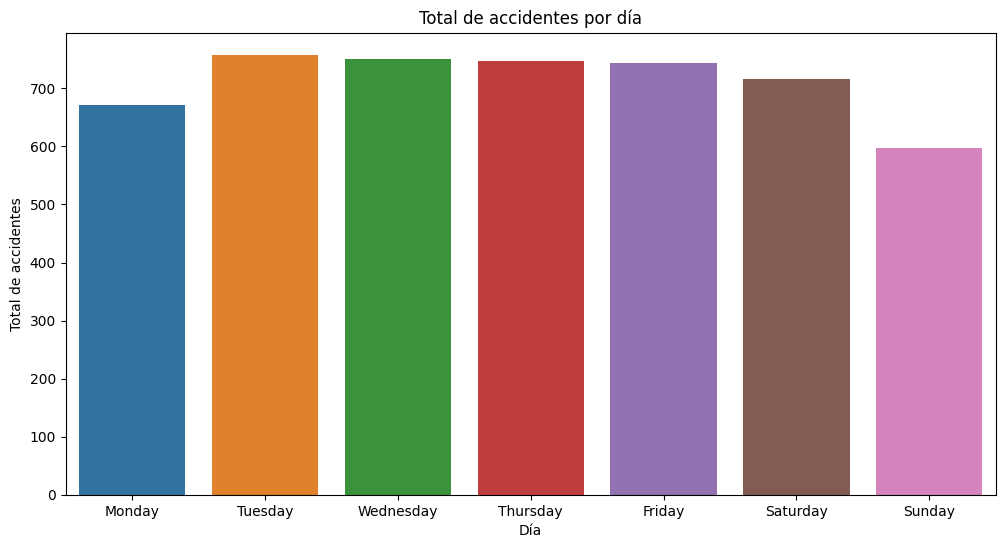

In [126]:
# Extraemos el día de la columna 'date'
dfacc['day'] = pd.to_datetime(dfacc['date']).dt.dayofweek

# Obtenemos los nombres de los días de la semana
dfacc['day'] = dfacc['day'].apply(lambda x: calendar.day_name[x])

# Agrupamos por día y contamos la cantidad de accidentes
accidents_by_day = dfacc.groupby('day').size().reset_index(name='accident_count')

# Ordenamos los días de la semana de forma cíclica
days_order = list(calendar.day_name)
accidents_by_day['day'] = pd.Categorical(accidents_by_day['day'], categories=days_order, ordered=True)
accidents_by_day = accidents_by_day.sort_values('day')

# Creamos el gráfico de barras con Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=accidents_by_day, x='day', y='accident_count')

# Establecemos etiquetas de los ejes
plt.xlabel('Día')
plt.ylabel('Total de accidentes')

# Establecemos título del gráfico
plt.title('Total de accidentes por día')

# Mostramos el gráfico
plt.show()


In [127]:
df_day = accidents_by_day.sort_values('accident_count', ascending = False)
df_day

,day,accident_count
5,Tuesday,758
6,Wednesday,751
4,Thursday,748
0,Friday,744
2,Saturday,717
1,Monday,671
3,Sunday,597


In [128]:
df_day.describe()

,accident_count
count,7.000000
mean,712.285714
std,59.002018
min,597.000000
25%,694.000000
50%,744.000000
75%,749.500000
max,758.000000


Concluimos que no existe mucha relevancia en el resultado del análisis por día, ya que los valores son similares y no están muy dispersos entre sí.

### KPI's

#### KPI 1. Evaluar la disminución de un 10% la tasa de fatalidad de la tripulación en los últimos 10 años, comparado a la década anterior.

Definimos la tasa de fatalidad de la tripulación como el número total de tripulantes fallecidos en los accidentes registrados en la década a considerar, dividido en la cantidad total de accidentes aéreos ocurridos en este período de tiempo. Su fórmula es (Suma total de fallecidos en el período de tiempo / Suma total de accidentes en el período de tiempo).


In [139]:
# Calculamos las dos decadas en virtud del ultimo año que tiene registros en el dataframe: 
current_year = dfacc['year'].max()
last_two_decades = dfacc[(dfacc['year'] >= current_year - 20) & (dfacc['year'] <= current_year)]

# Dividimos los datos en dos DataFrames: última década y década anterior
current_decade = last_two_decades[last_two_decades['year'] >= current_year - 10]
previous_decade = last_two_decades[last_two_decades['year'] < current_year - 10]

# Calculamos la tasa de fatalidad de la tripulación para cada década: 
def calculate_crew_fatality_rate(df):
    total_crew_fatalities = df['crew_fatalities'].sum()
    total_accidents = df.shape[0]
    return total_crew_fatalities / total_accidents

crew_fatality_rate_current = round(calculate_crew_fatality_rate(current_decade), 2) 
crew_fatality_rate_previous = round(calculate_crew_fatality_rate(previous_decade), 2) 

print('Tasa de fatalidad de los tripulantes en la decada pasada: ', crew_fatality_rate_previous)
print('Tasa de fatalidad de los tripulantes en la decada actual: ', crew_fatality_rate_current) 


Tasa de fatalidad de los tripulantes en la decada pasada:  3.24
Tasa de fatalidad de los tripulantes en la decada actual:  3.66


In [130]:
previous_decade

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,...,total_killed_ground,summary,country,surface,category,brand,survivors,year,month,day
4311,2001-01-04,,"Zheng Zou AB, China",Military - People's Liberation Army,,Training,Shaanxi Yunshuji Y-8/Yunshuji Y-8,16.0,0.0,16.0,...,6.0,Two Antonov 12 planes collided in midair killi...,China,ground,military,other,0.0,2001,January,Thursday
4312,2001-01-08,,"Near Silimo, Indonesia",Military - Tentara Nasional Indonesia Navy,,Timika - Jayapura,CASA 212-MP Aviocar 200,9.0,0.0,9.0,...,0.0,"Struck Timika Peak at 11,800 ft. shortly after...",Indonesia,ground,military,other,0.0,2001,January,Monday
4313,2001-01-23,21:35,"Eider Point, Alaska",Majestic Air Cargo,,,Douglas C-47A-30-DK (DC-3C),2.0,0.0,2.0,...,0.0,The cargo plane crashed on Table Top Mountain ...,United States,ground,non-military,McDonnell Douglas,0.0,2001,January,Tuesday
4314,2001-01-25,18:15,"Ciudad Bolivar, Venezuela",Rutaca Airlines,224,Canaina - Ciudad Bolivar - Por La Mar,Douglas DC-3C (C47A-DL),24.0,20.0,4.0,...,0.0,The plane caught fire shortly after taking off...,Venezuela,ground,non-military,McDonnell Douglas,0.0,2001,January,Thursday
4315,2001-01-27,17:37,"Byers, Colorado",North Bay Charter,,"Broomfield, CO - Stillwater, OK",Beech King Air 200 Catpass,10.0,8.0,2.0,...,0.0,The plane was on a charter flight from Jeffers...,United States,ground,non-military,other,0.0,2001,January,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4790,2010-11-05,07:10,"Near Karachi, Pakistan",JS Air,,Karachi - Oil compound in Sindh province,Beechcraft 1900C-1,21.0,17.0,4.0,...,0.0,"The plane, carrying Italian oil company person...",Pakistan,ground,non-military,Beechcraft,0.0,2010,November,Friday
4791,2010-11-25,12:07,"Strezhevoy, Russia",NARZ,,,Mil Mi-8T,10.0,NaN,NaN,...,0.0,"The helicopter, which was delivering workers t...",Russia,ground,non-military,other,3.0,2010,November,Thursday
4792,2010-11-28,01:53,"Karachi, Pakistan",Sun Way,4412,Karachi - Khartoum,Ilyushin Il-76TD,8.0,0.0,8.0,...,4.0,"The cargo plane, carrying 31 tons of relief su...",Pakistan,ground,non-military,Ilyushin,0.0,2010,November,Sunday
4793,2010-12-04,14:49,"Moscow, Russia",Dagestan Airlines,372,"Moscow -Makhachkala, Dagestan",Tupolev Tu-154M,169.0,160.0,9.0,...,0.0,"About 80km out from Moscow, the crew reported ...",Russia,ground,non-military,Tupolev,167.0,2010,December,Saturday


In [131]:
current_decade.head()

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,...,total_killed_ground,summary,country,surface,category,brand,survivors,year,month,day
4795,2011-01-01,15:25,"Surgut, Russia",Kogalmavia,348,Surgut - Moscow,Tupolev Tu-154B-2,124.0,116.0,8.0,...,0.0,The passenger jet caught fire and exploded as ...,Russia,ground,non-military,Tupolev,121.0,2011,January,Saturday
4796,2011-01-09,19:45,"Orumiyeh, Iran",Iran Air,277,Tehran - Orumiyeh,Boeing B-727-286,105.0,93.0,12.0,...,0.0,The accident happened after the plane was unab...,Iran,ground,non-military,Boeing,28.0,2011,January,Sunday
4797,2011-02-08,16:40,"Off Plettenberg Bay, South Africa",Majuba Aviation,,Queenstown - Plettenberg Bay,Pilatus PC-12/47,9.0,7.0,2.0,...,0.0,"When the crew encountered dense fog, limiting ...",South Africa,ground,non-military,other,0.0,2011,February,Tuesday
4798,2011-02-10,09:45,"Cork, Ireland",Manx2,7100,Belfast - Cork,Swearingen SA-227BC Metro III,12.0,10.0,2.0,...,0.0,The Metroliner made an approach to Runway 17 i...,Ireland,ground,non-military,other,6.0,2011,February,Thursday
4799,2011-02-14,08:02,"Near Santa Ana Francisco Morazan, Honduras",Central American Airways,731,San Pedro Sula - Tegucigalpa,Let L-410 UVPE-20,14.0,12.0,2.0,...,0.0,The small airlilner crashed into a hill at an ...,Honduras,ground,non-military,other,0.0,2011,February,Monday


In [132]:
crew_fatality_rate_current = calculate_crew_fatality_rate(current_decade)
crew_fatality_rate_previous = calculate_crew_fatality_rate(previous_decade)

# Verificar si la tasa actual se ha reducido en un 10% o más en comparación con la década anterior
if crew_fatality_rate_current <= 0.9 * crew_fatality_rate_previous:
    print("La tasa de fatalidad de la tripulación ha disminuido en un 10% (o más) en los últimos 10 años en comparación con la década anterior.")
else:
    print("La tasa de fatalidad de la tripulación no ha disminuido en un 10% (o más) en los últimos 10 años en comparación con la década anterior.")

La tasa de fatalidad de la tripulación no ha disminuido en un 10% (o más) en los últimos 10 años en comparación con la década anterior.


Como vemos, la tasa de fatalidad de la década anterior es mas baja comparada con la actual. Sin embargo, la diferencia entre ambas no es significativa, es mínima.

Concluimos entonces, según los resultados, que en ambas décadas han fallecido en promedio algo más de 3 tripulantes por accidente, contabilizando el total de accidentes de la década. Pero debemos analizar cuantos accidentes tuvimos en cada década para poder comparar y tener una visión general de estos valores para saber exactamente que representan.

Visualizamos ahora la cantidad de tripulantes fallecidos en proporción a la cantidad de accidentes: 

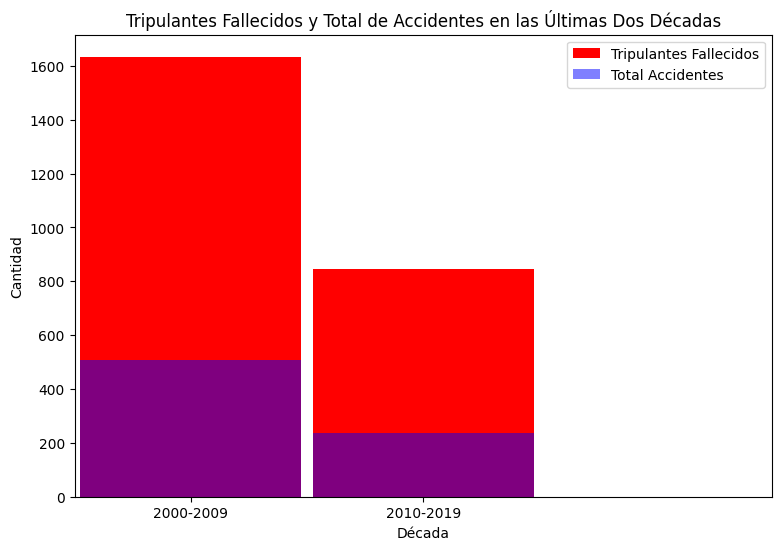

In [133]:
# Calculamos la década correspondiente usando year y creamos una nueva columna 'decade':
dfacc['decade'] = (dfacc['date'].dt.year // 10) * 10

# Agrupamos por década y calculamos la suma de tripulantes fallecidos y la cuenta de accidentes: 
decade_stats = dfacc.groupby('decade').agg({'crew_fatalities': 'sum', 'date': 'count'}).reset_index()
decade_stats.rename(columns={'crew_fatalities': 'Total Tripulantes Fallecidos', 'date': 'Total Accidentes'}, inplace=True)

# Filtramos los datos para las dos últimas décadas (2000-2009 y 2010-2019)
last_two_decades = decade_stats[(decade_stats['decade'] >= 2000) & (decade_stats['decade'] < 2020)]

# Graficamos los resultados
plt.figure(figsize=(9, 6))
plt.bar(last_two_decades['decade'], last_two_decades['Total Tripulantes Fallecidos'], 
        label='Tripulantes Fallecidos', color='red', width=9.5)  # Ancho de la barra ajustado para representar décadas
plt.bar(last_two_decades['decade'], last_two_decades['Total Accidentes'], 
        label='Total Accidentes', color='blue', alpha=0.5, width=9.5)  # Ancho de la barra ajustado
plt.xlabel('Década')
plt.ylabel('Cantidad')
plt.title('Tripulantes Fallecidos y Total de Accidentes en las Últimas Dos Décadas')
plt.legend()

# Configuramos la escala del eje x para mostrar décadas con un intervalo de 10 años
plt.xticks(range(2000, 2020, 10), ['2000-2009', '2010-2019'])

# Ajustamos los límites del eje x para que las barras abarquen las décadas completas
plt.xlim(1995, 2025)

plt.show()

- Vimos antes que si bien la tasa de fatalidad de la tripulacion en la década actual no ha bajado comparado con la decada anterior (es decir más alta la actual), la cantidad de tripulantes fallecidos si ha bajado en términos absolutos. 
- Esto significa entonces, en otras palabras, que en esta década tenemos menos accidentes, y menos tripulantes fallecidos, pero en proporción (es decir en términos relativos) tenemos más porcentaje de fallecidos respecto al total de accidentes que en la década pasada.

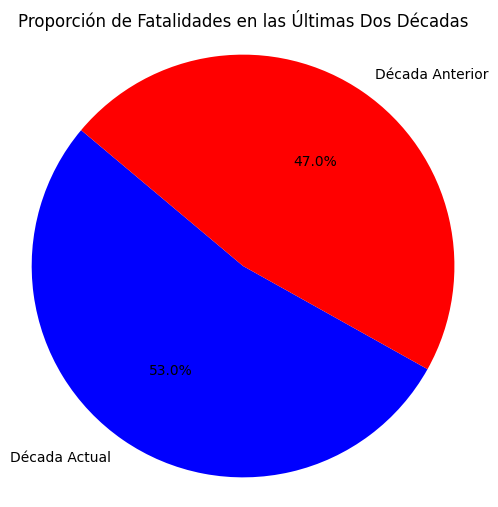

In [134]:
# Creamos una lista con la tasa de fatalidad de la tripulación para cada década:
fatality_rates = [crew_fatality_rate_current.sum(), crew_fatality_rate_previous.sum()]

# Etiquetas para las décadas:
labels = ['Década Actual', 'Década Anterior']

# Colores para las partes del gráfico:
colors = ['blue', 'red']

# Creamos el gráfico de torta:
plt.figure(figsize=(6, 6))
plt.pie(fatality_rates, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Configuramos el título del gráfico:
plt.title('Proporción de Fatalidades en las Últimas Dos Décadas')

# Graficamos: 
plt.axis('equal')  # Para asegurarse de que el gráfico sea circular
plt.show()

Nuevamente, se manifiesta lo que dijimos. En términos absolutos, tenemos menos fallecidos en la década actual, pero en proporción (términos relativos) están muy cerca. Eso explica porque ambas tasas muestran que en promedio fallecen 3 tripulantes por accidente aproximadamente. 

#### KPI 2. Evaluar la disminución de la cantidad de Accidentes por año en Estados Unidos. Objetivo: reducir en un 5% la cantidad de accidentes en los últimos 20 años.

Analizamos la cantidad de accidentes ocurridos en un mismo año, solamente ocurridos dentro de Estados Unidos (contando todos sus Estados). Tomamos Estados Unidos por ser el país con mayor numero de accidentes a lo largo de los años. 

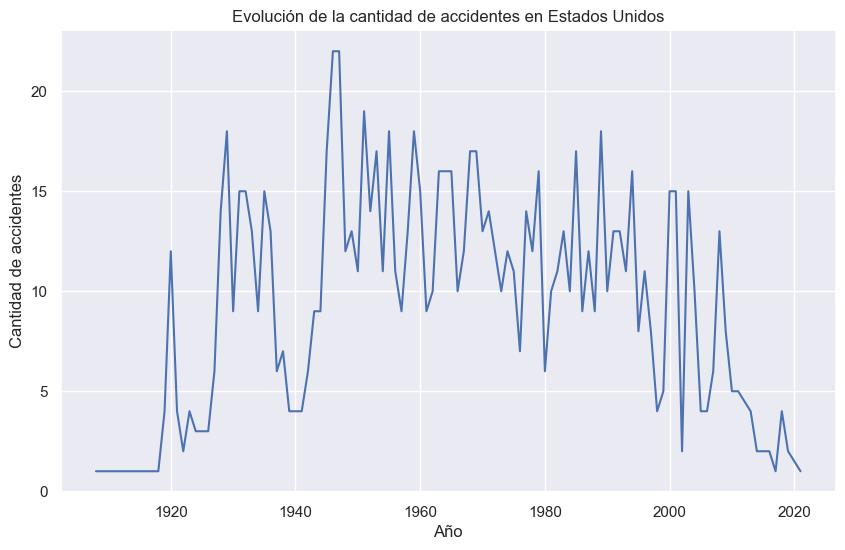

In [135]:
# Filtramos el DataFrame solo para los accidentes en Estados Unidos: 
df_usa = dfacc[dfacc['country'] == 'United States']

# Agrupamos por año y contamos la cantidad esa cantidad de accidentes: 
accidents_by_year = df_usa.groupby('year').size().reset_index(name='count')

# Configuramos el estilo
sns.set(style="darkgrid")

# Creamos el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=accidents_by_year, x='year', y='count')

# Configuramos el título y las etiquetas de los ejes
plt.title('Evolución de la cantidad de accidentes en Estados Unidos')
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')

# Mostrar el gráfico
plt.show()

Podemos observar que pese a ser el país con mayor número de accidentes en toda la historia, la cantidad de accidentes fue en alza desde el comienzo del siglo pasado hasta casi mitad del siglo, después se mantuvo descendiendo escueta y progresivamente hasta finales del siglo, más precisamente en la última década, cuando comenzó la tendencia a la baja. 

Procedemos entonces a filtrr el DataFrame solo para los accidentes en Estados Unidos y a partir de 2000:


In [136]:
df_usa_filtered = dfacc[(dfacc['country'] == 'United States') & (dfacc['year'] >= 2000)]

# Agrupamos por año y contamos la cantidad de accidentes
accidents_by_year = df_usa_filtered.groupby('year').size().reset_index(name='accident_count')

# Calculamos la variación anual de accidentes
accidents_by_year['accident_variation'] = accidents_by_year['accident_count'].pct_change() 
# Con pct_change calculamos la variacion en porcentaje entre el elemento actual y el anterior

# Creamos un nuevo DataFrame con los resultados
accidents_variation_df = accidents_by_year[['year','accident_count', 'accident_variation']].copy()

# Observamos el dataframe
accidents_variation_df


,year,accident_count,accident_variation
0,2000,15,NaN
1,2001,15,0.000000
2,2002,2,-0.866667
3,2003,15,6.500000
4,2004,10,-0.333333
5,2005,4,-0.600000
6,2006,4,0.000000
7,2007,6,0.500000
8,2008,13,1.166667
9,2009,8,-0.384615


Los años en los que se ha visualizado una disminución interanual, han tenido un porcentaje mayor al 0.20 por lo que se podría cumplir en parte el objetivo de reducir la cantidad de accidentes. Depende de como se analice el KPI: si se considera el total de accidentes de las 2 décadas, podría entenderse que el KPI ha mejorado bastante, en otras palabras la cantidad de accidentes por año ha reducido considerablemente a lo largo de esos 20 años. 

Ahora, lo vemos graficamente, tanto al número de accidentes como a la variación interanual:

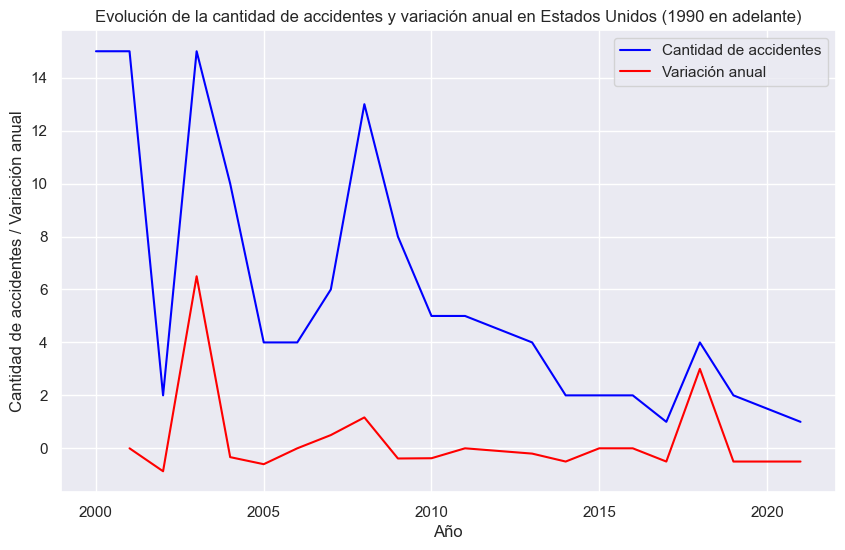

In [137]:
sns.set(style="darkgrid")

# Creamos el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=accidents_variation_df, x='year', y='accident_count', label='Cantidad de accidentes', color='blue')
sns.lineplot(data=accidents_variation_df, x='year', y='accident_variation', label='Variación anual', color='red')

# Configuramos el título y las etiquetas de los ejes: 
plt.title('Evolución de la cantidad de accidentes y variación anual en Estados Unidos (1990 en adelante)')
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes / Variación anual')

# Mostramos el gráfico: 
plt.legend()
plt.show() 

El gráfico nos muestra, como dijimos, la evolución de la cantidad de accidentes aéreos en Estados Unidos desde el año 2000 en adelante. 

Se visualizan dos líneas:
- La línea azul representa la cantidad de accidentes en cada año a lo largo de los años.

- La línea roja representa la variación anual en la cantidad de accidentes. Es decir, nos muestra cómo cambia la cantidad de accidentes con respecto al año anterior. Cuando la línea roja está por encima de cero, significa que hubo un aumento en la cantidad de accidentes en comparación con el año anterior, y cuando está por debajo de cero, significa que hubo una disminución en la cantidad de accidentes en comparación con el año anterior.

### Exportación a formato CSV

In [138]:
dfacc.to_csv('air_accidents.csv', index=False, sep = ';')